In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

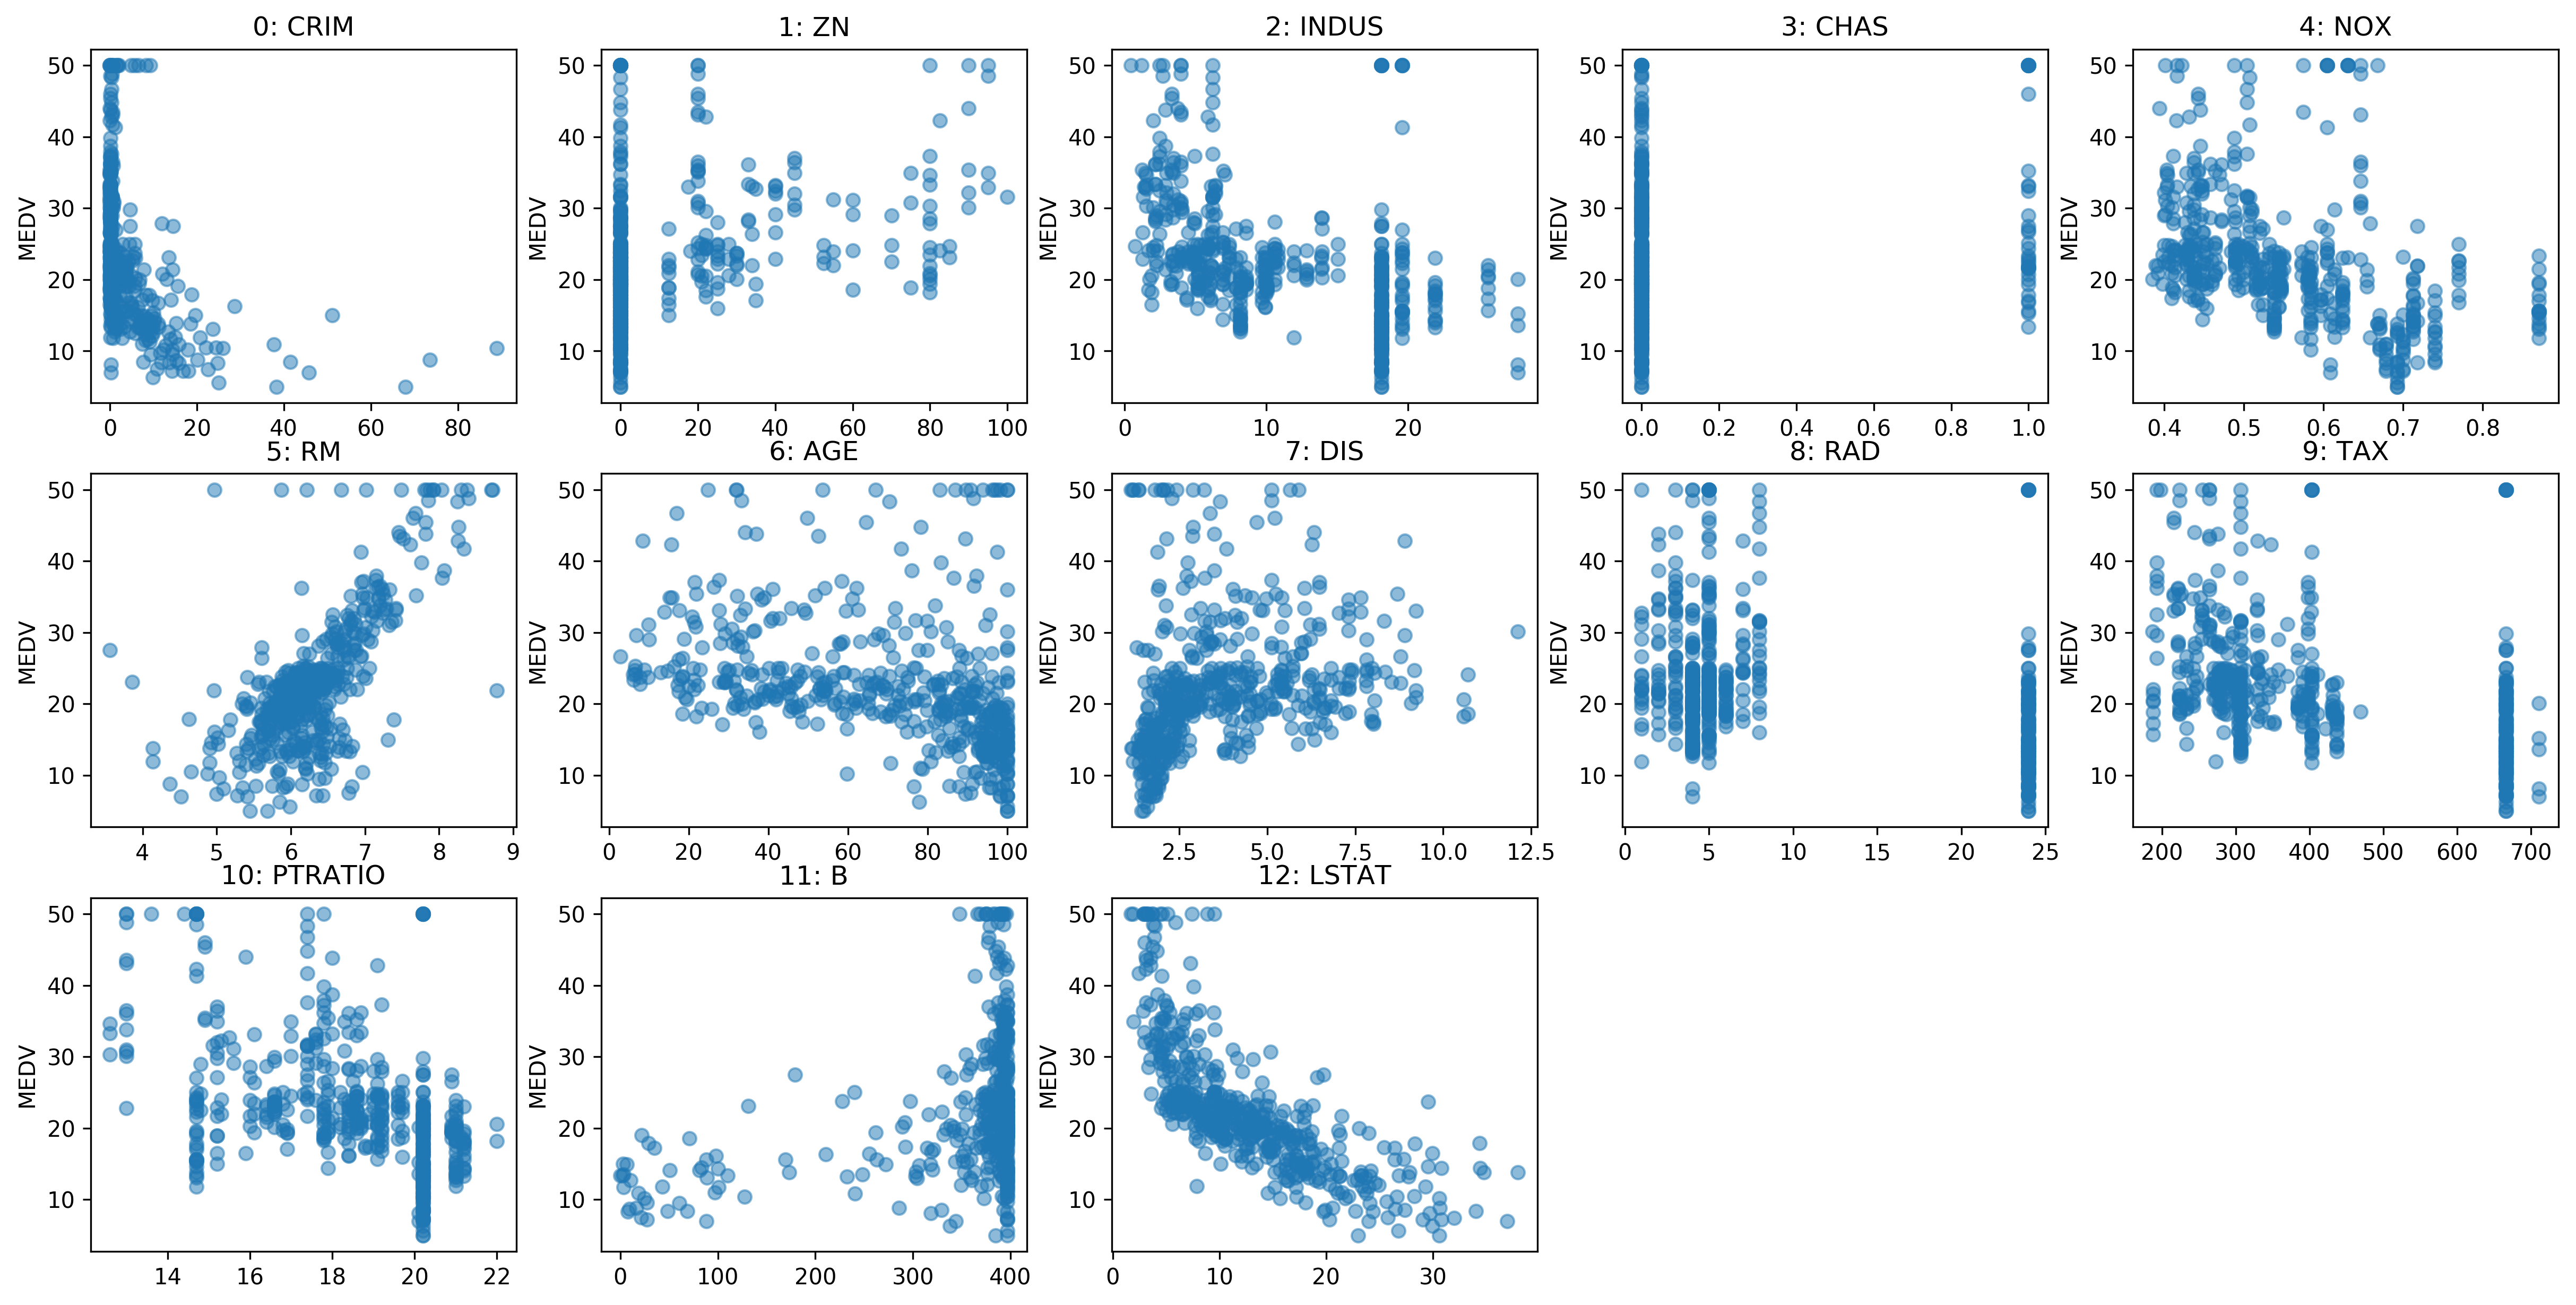

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

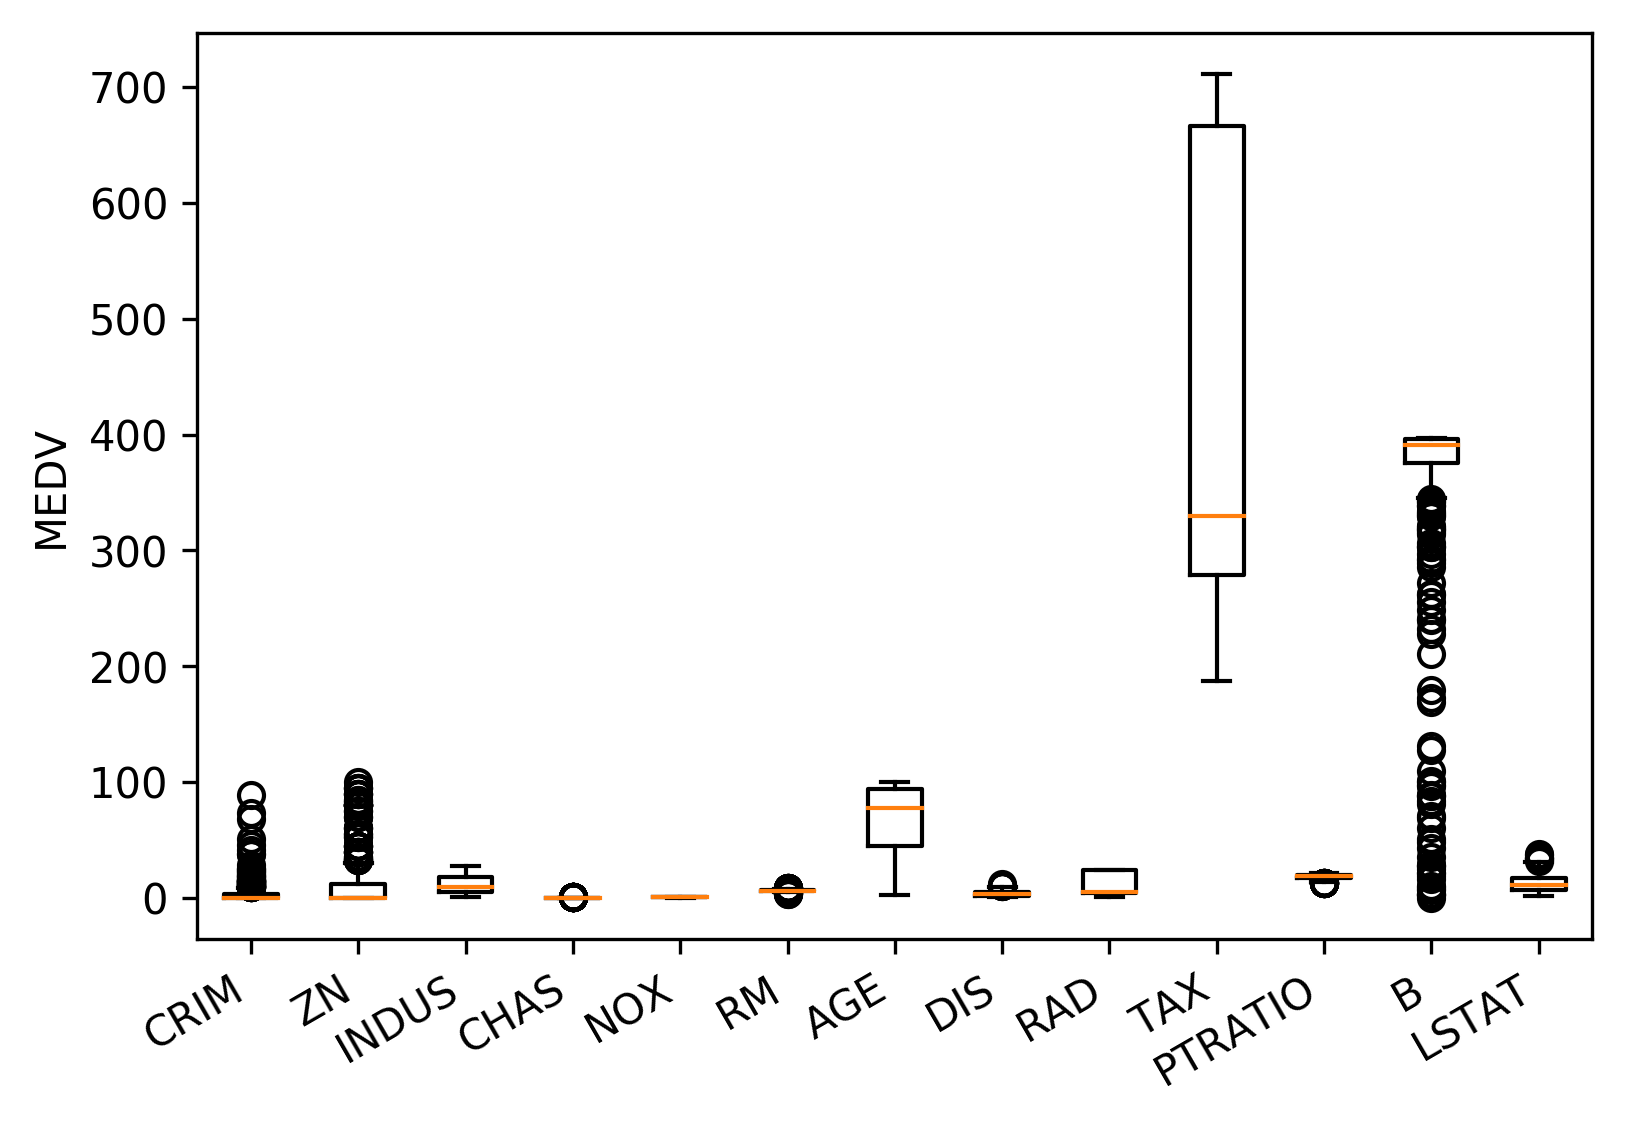

In [5]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("MEDV")

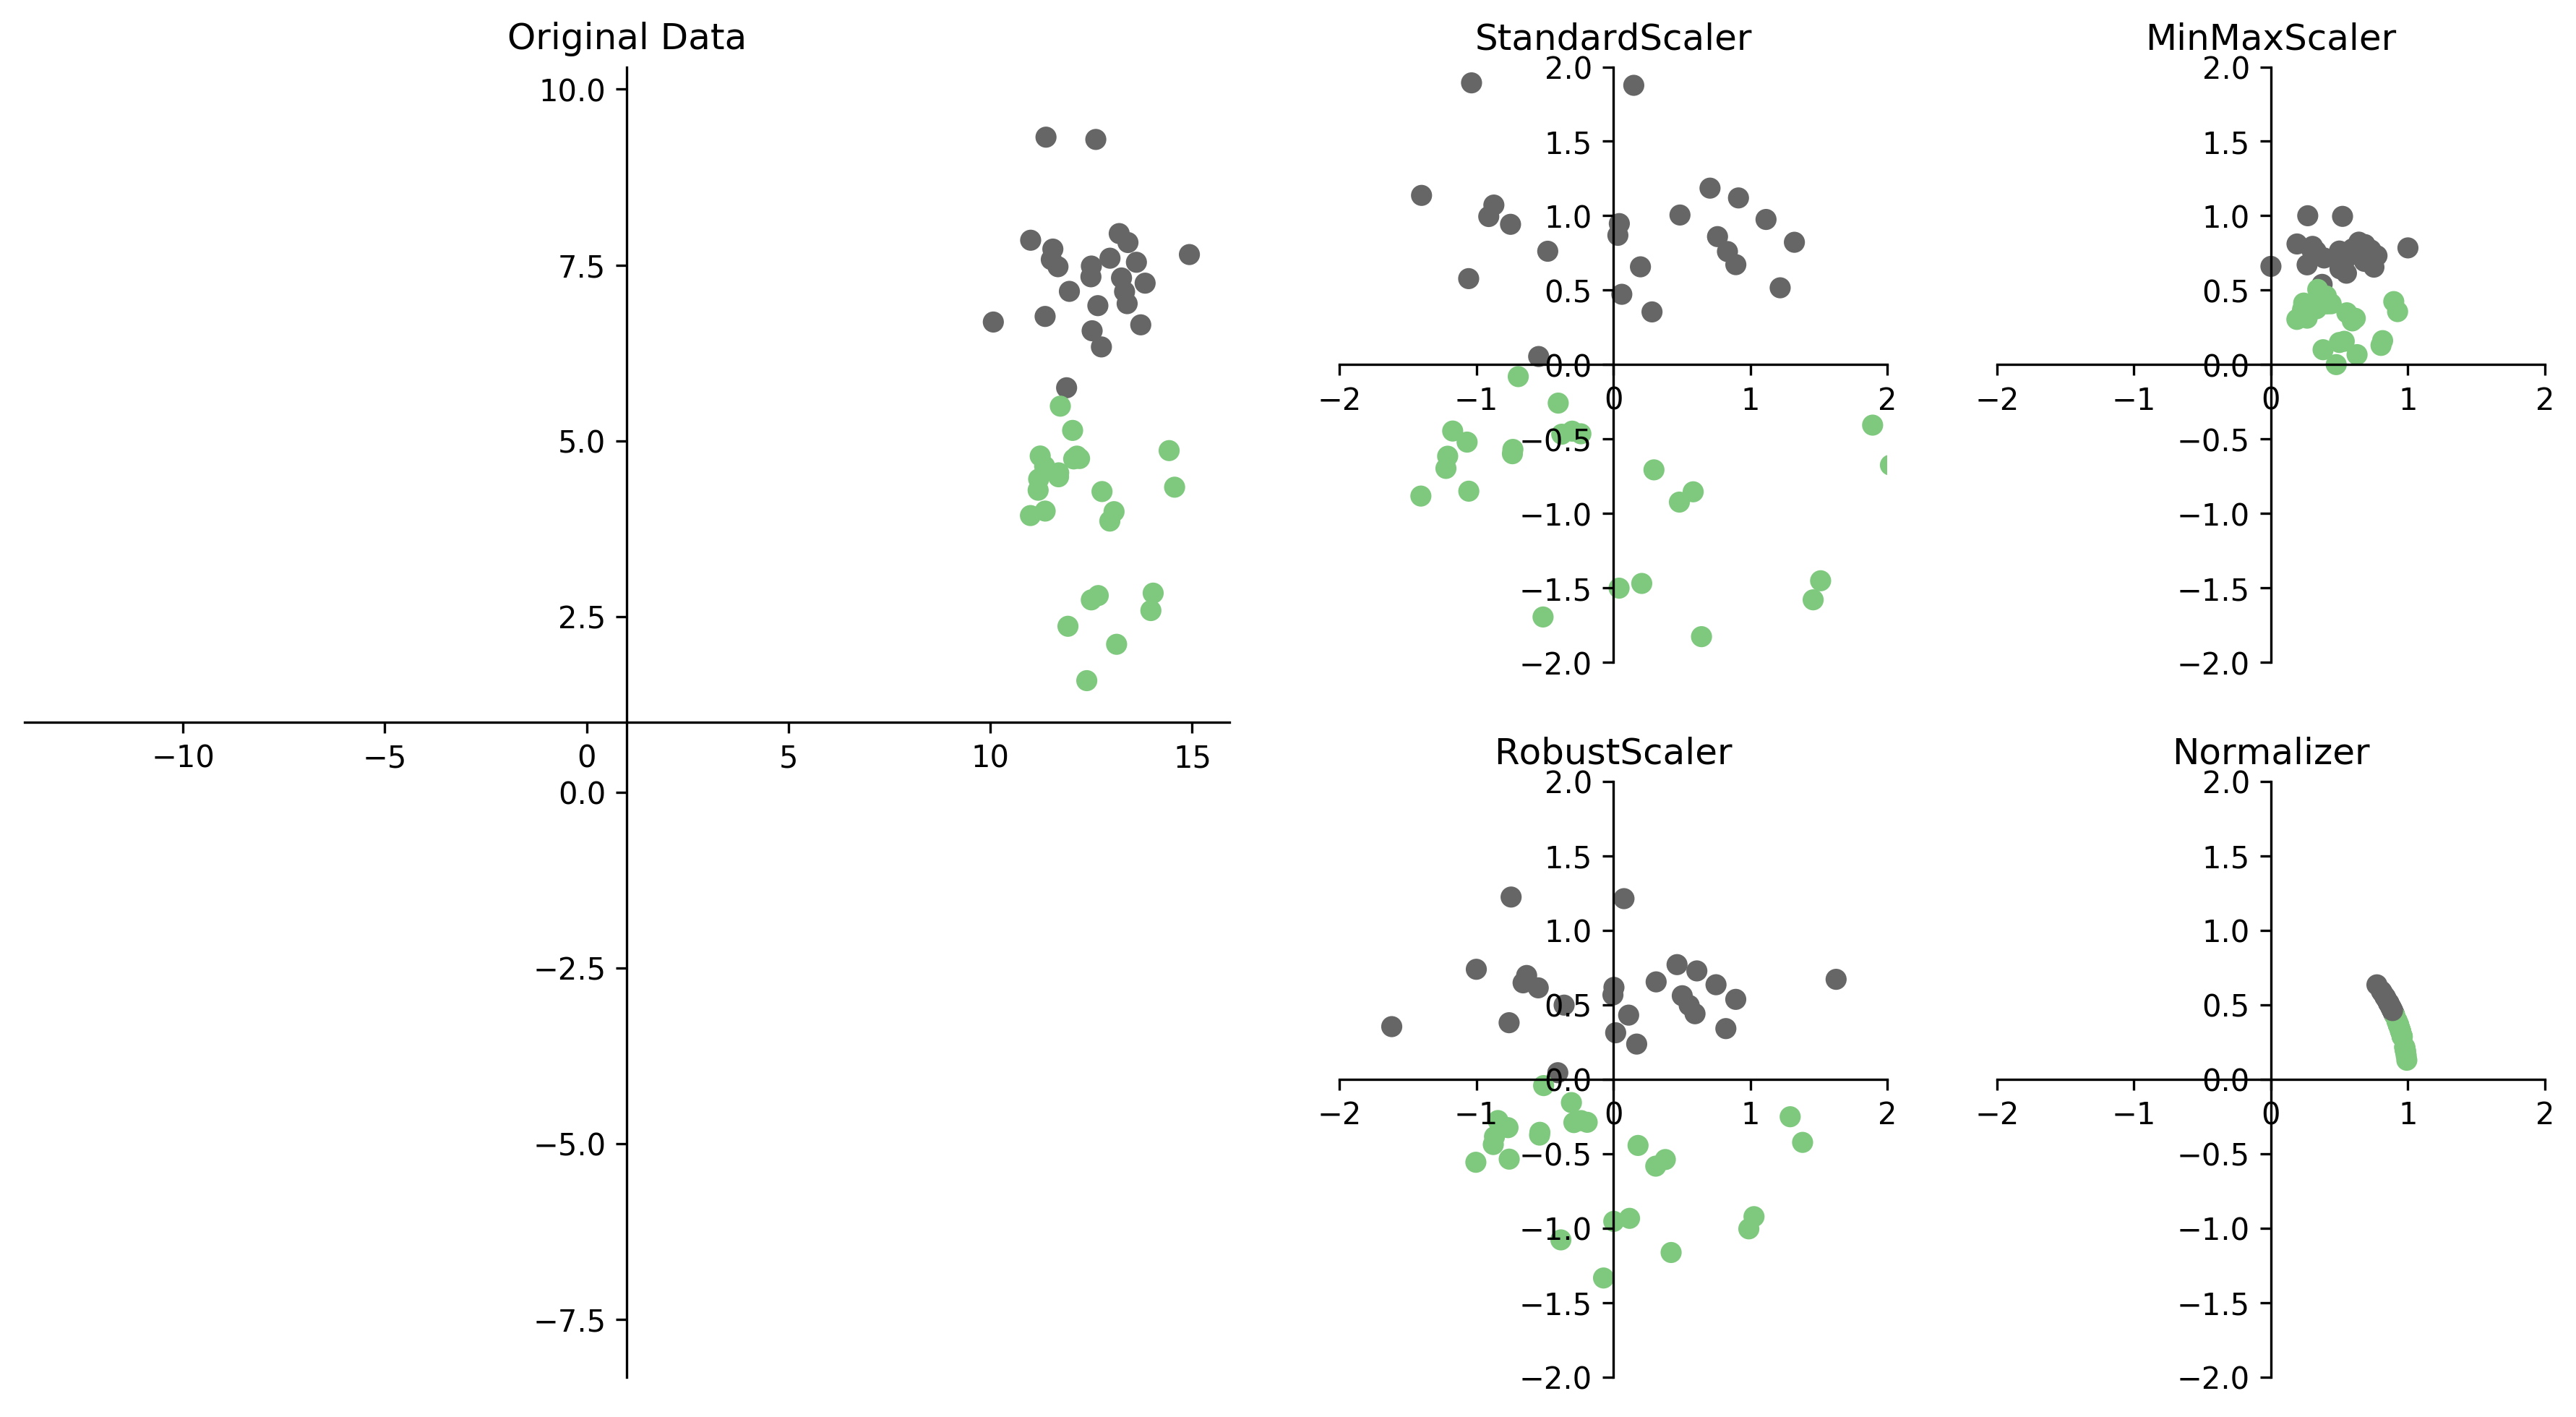

In [6]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3 

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                   MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.71718655233314066, 0.12521148650633437)

In [12]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.71789046947346136, 0.12695447250917097)

In [13]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.49871865806668803, 0.14628381664585244)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.74979219238995831, 0.10573244928159024)

# Pipelines

In [17]:
from sklearn.linear_model import Ridge
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

0.63448846877867426

In [18]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.63448846877867426

In [19]:
from sklearn.neighbors import KNeighborsRegressor
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
scores = cross_val_score(knn_pipe, X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.74531180733825564, 0.10614366233973388)

In [20]:
print(knn_pipe.steps)

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsregressor', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'))]


In [21]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((("scaler", StandardScaler()),
                 ("regressor", KNeighborsRegressor)))

In [22]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
0.600015753391


# Feature Distributions

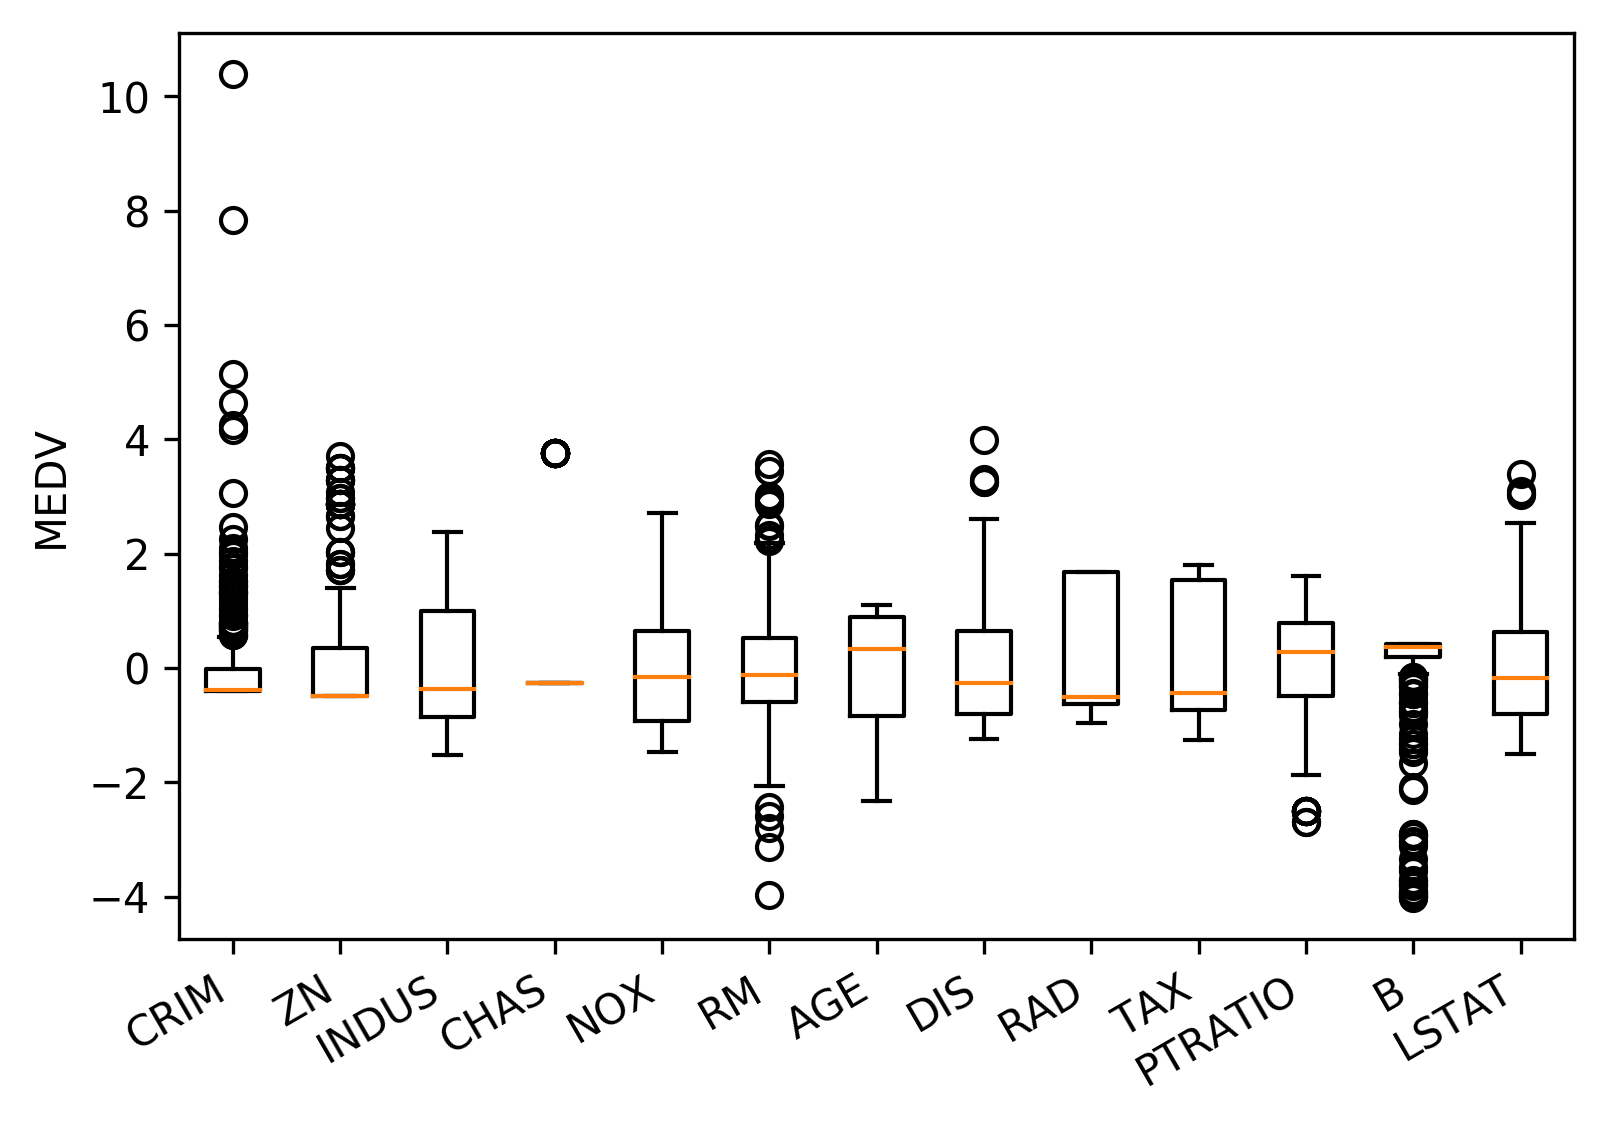

In [23]:
plt.boxplot(X_train_scaled)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("MEDV")

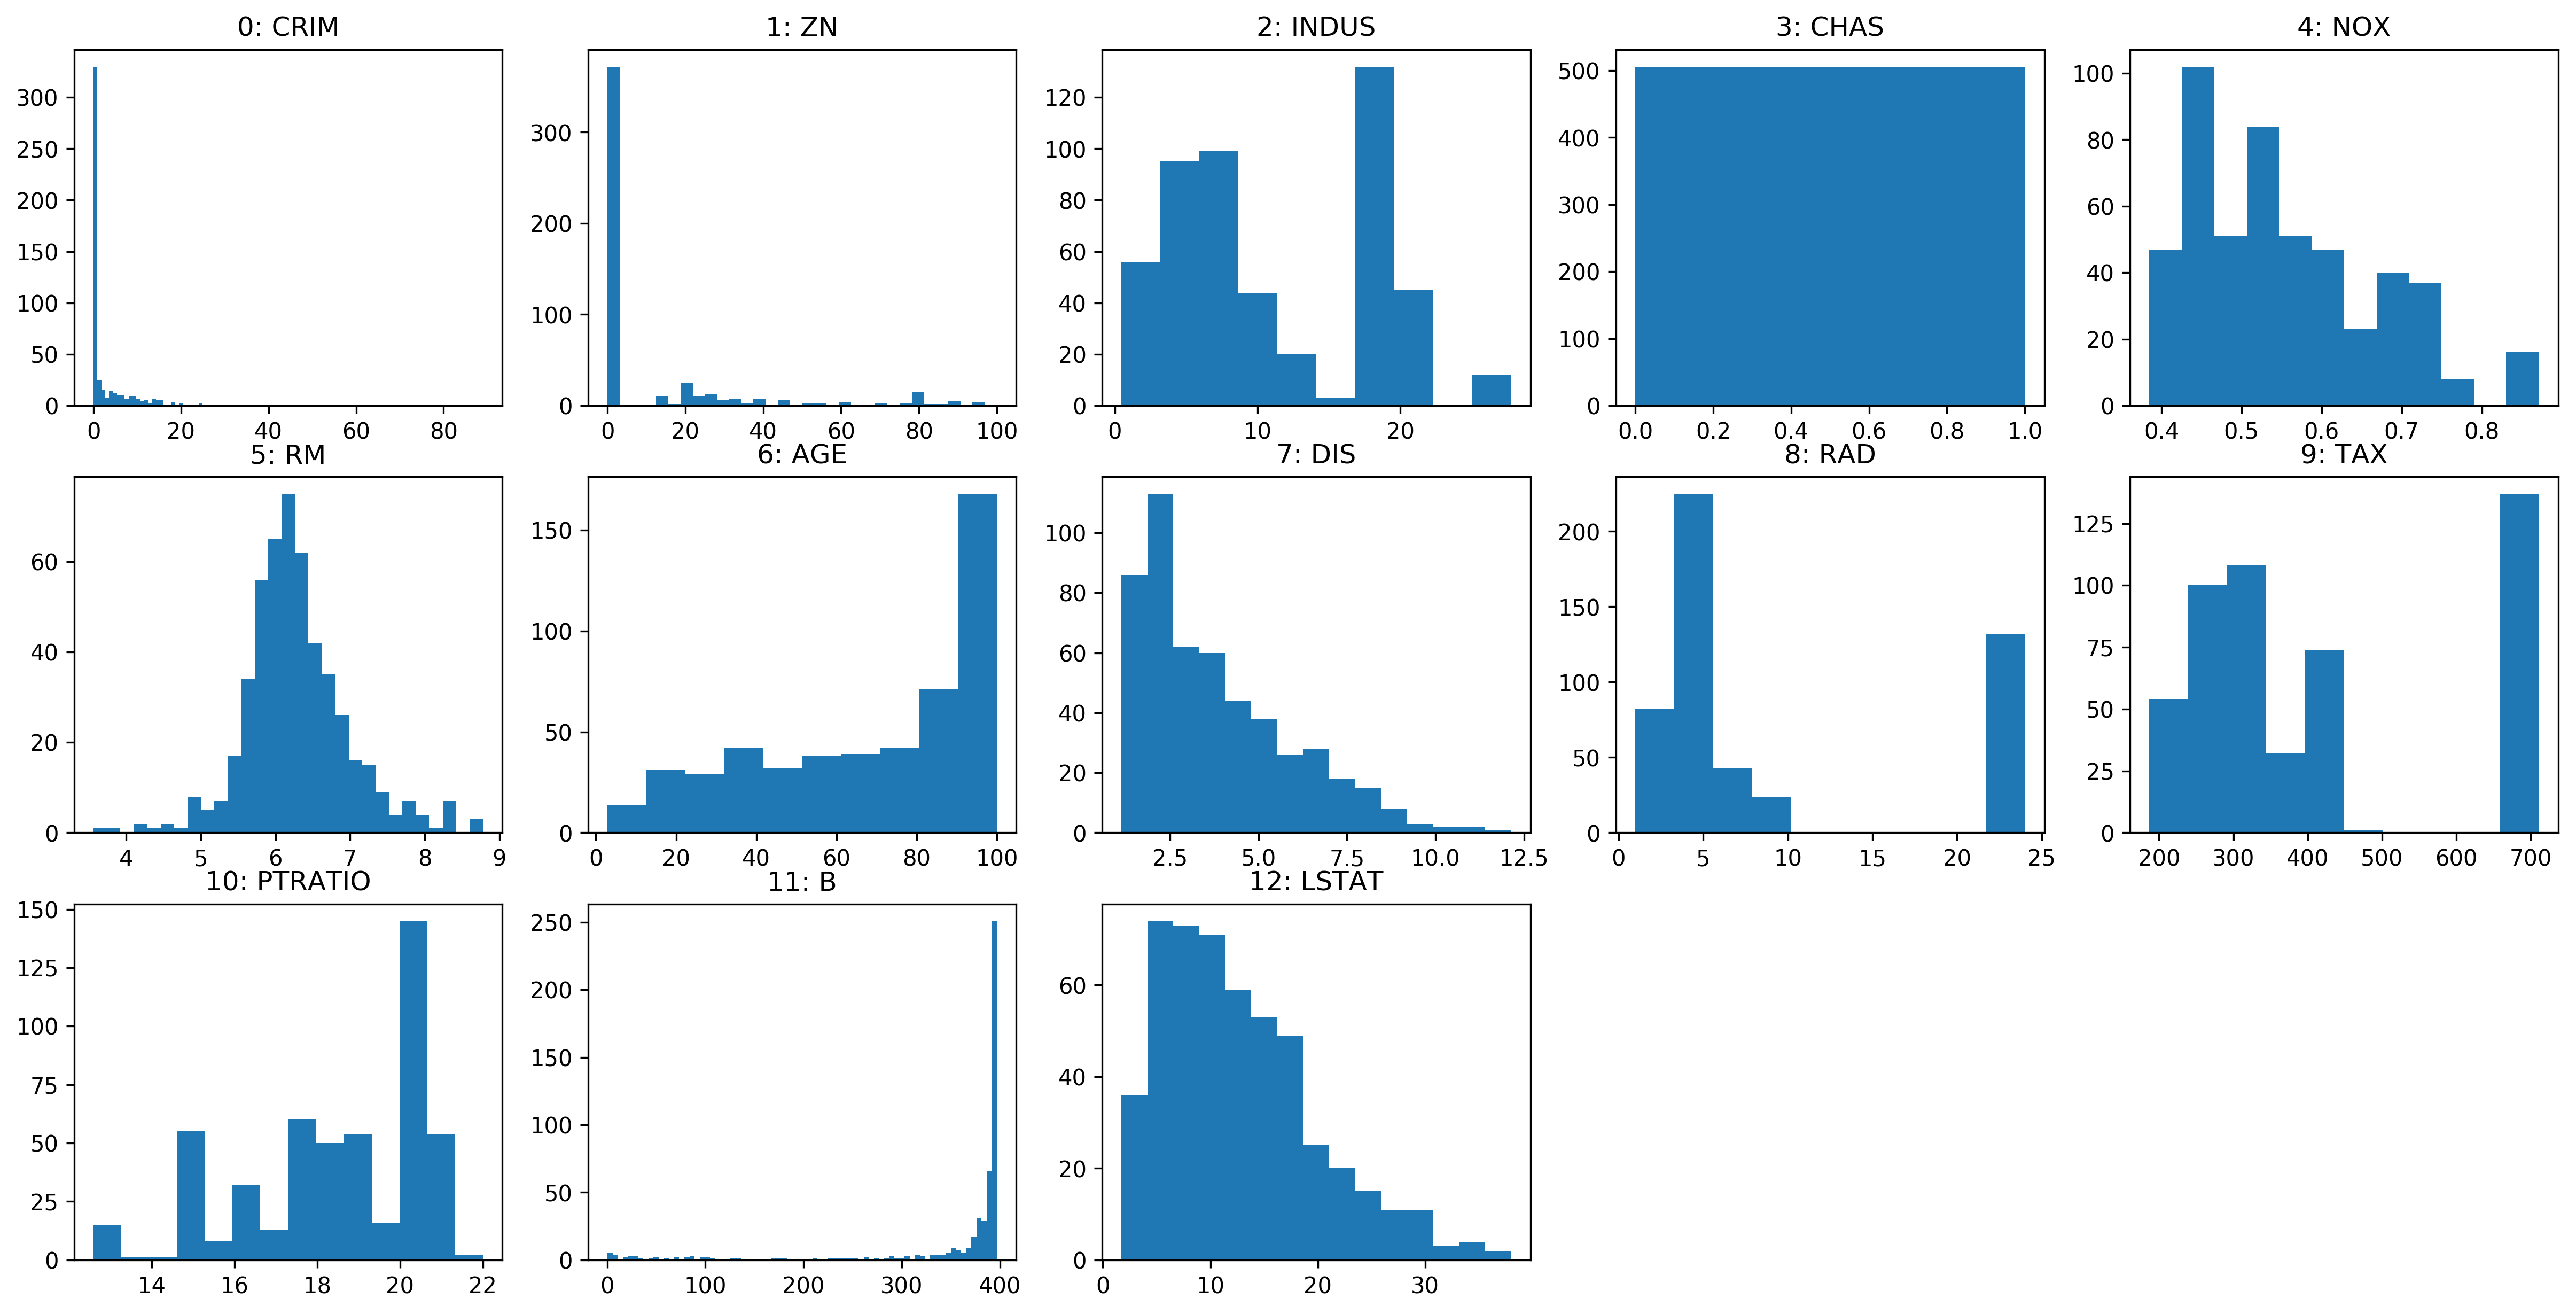

In [24]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.hist(X[:, i], bins="auto")
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))

In [25]:
def bc(x, l):
    if l == 0:
        return np.log(x)
    else:
        return (x ** l - 1) / l


In [26]:
line = np.arange(1e-10, 10, 100)

In [27]:
line

array([  1.00000000e-10])

(0, 10)

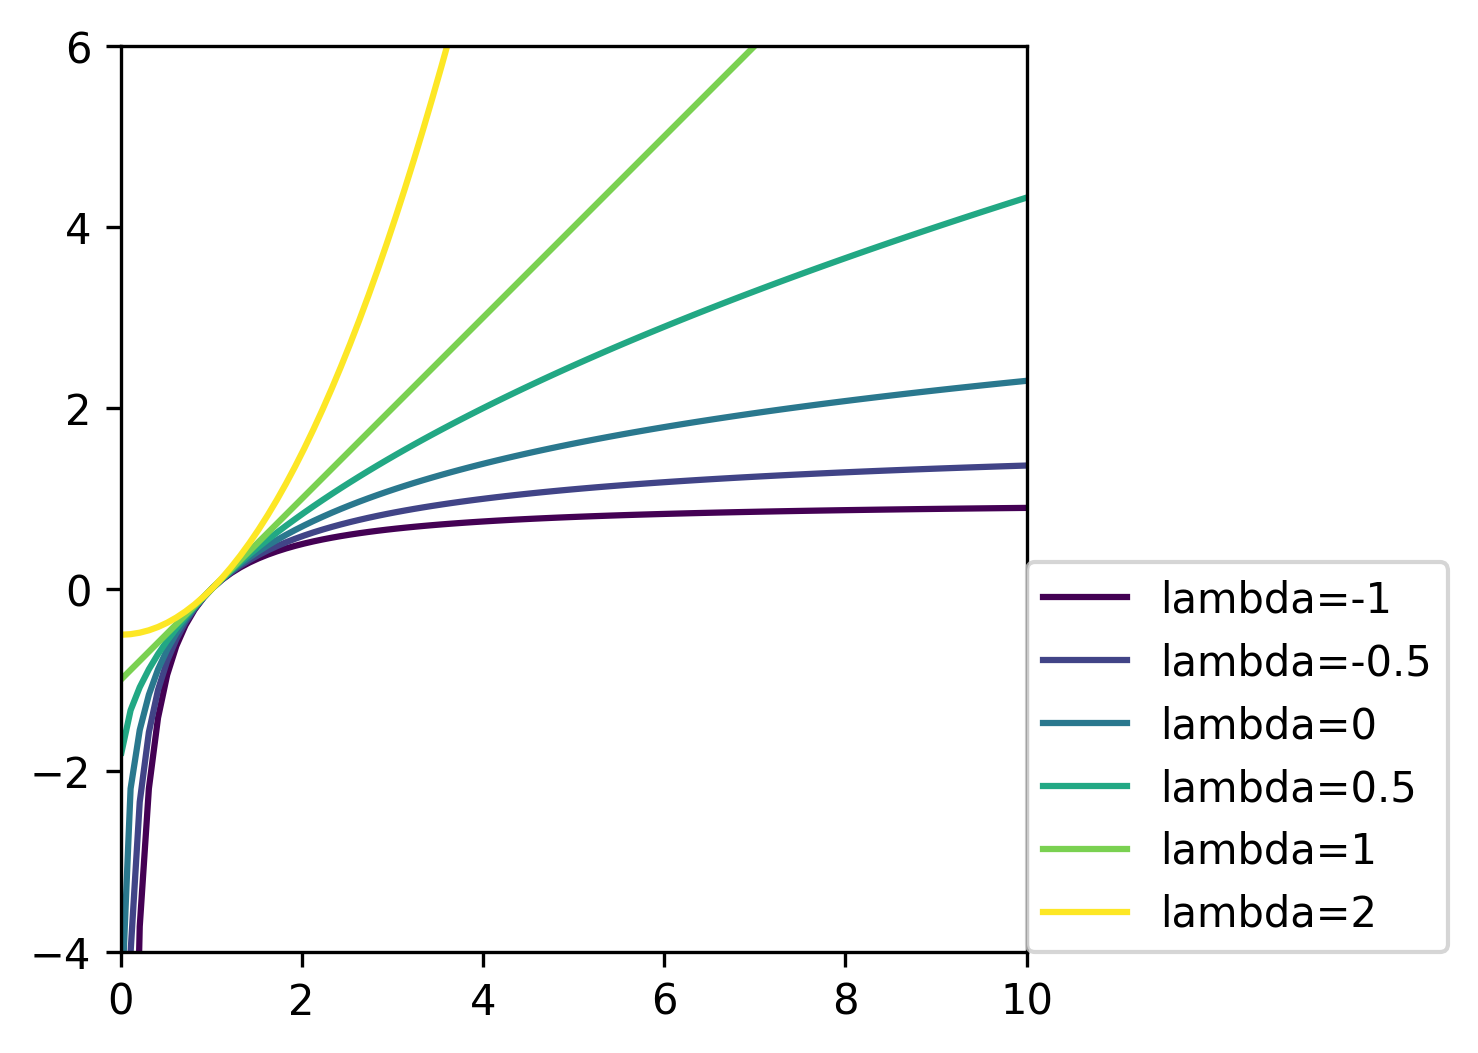

In [28]:
line = np.linspace(.01, 10, 100)
colors =  [plt.cm.viridis(i) for i in np.linspace(0, 1, 6)]
for l, c in zip([-1, -.5, 0, .5, 1, 2], colors):
    plt.plot(line, bc(line, l), label="lambda={}".format(l), color=c)
plt.ylim(-4, 6)
plt.gca().set_aspect("equal")
plt.legend(loc=(1, 0))
plt.xlim(0, 10)

In [29]:
from sklearn.preprocessing import MinMaxScaler
# this is very hacky and you probably shouldn't do this in real life.
X_train_mm = MinMaxScaler().fit_transform(X_train)

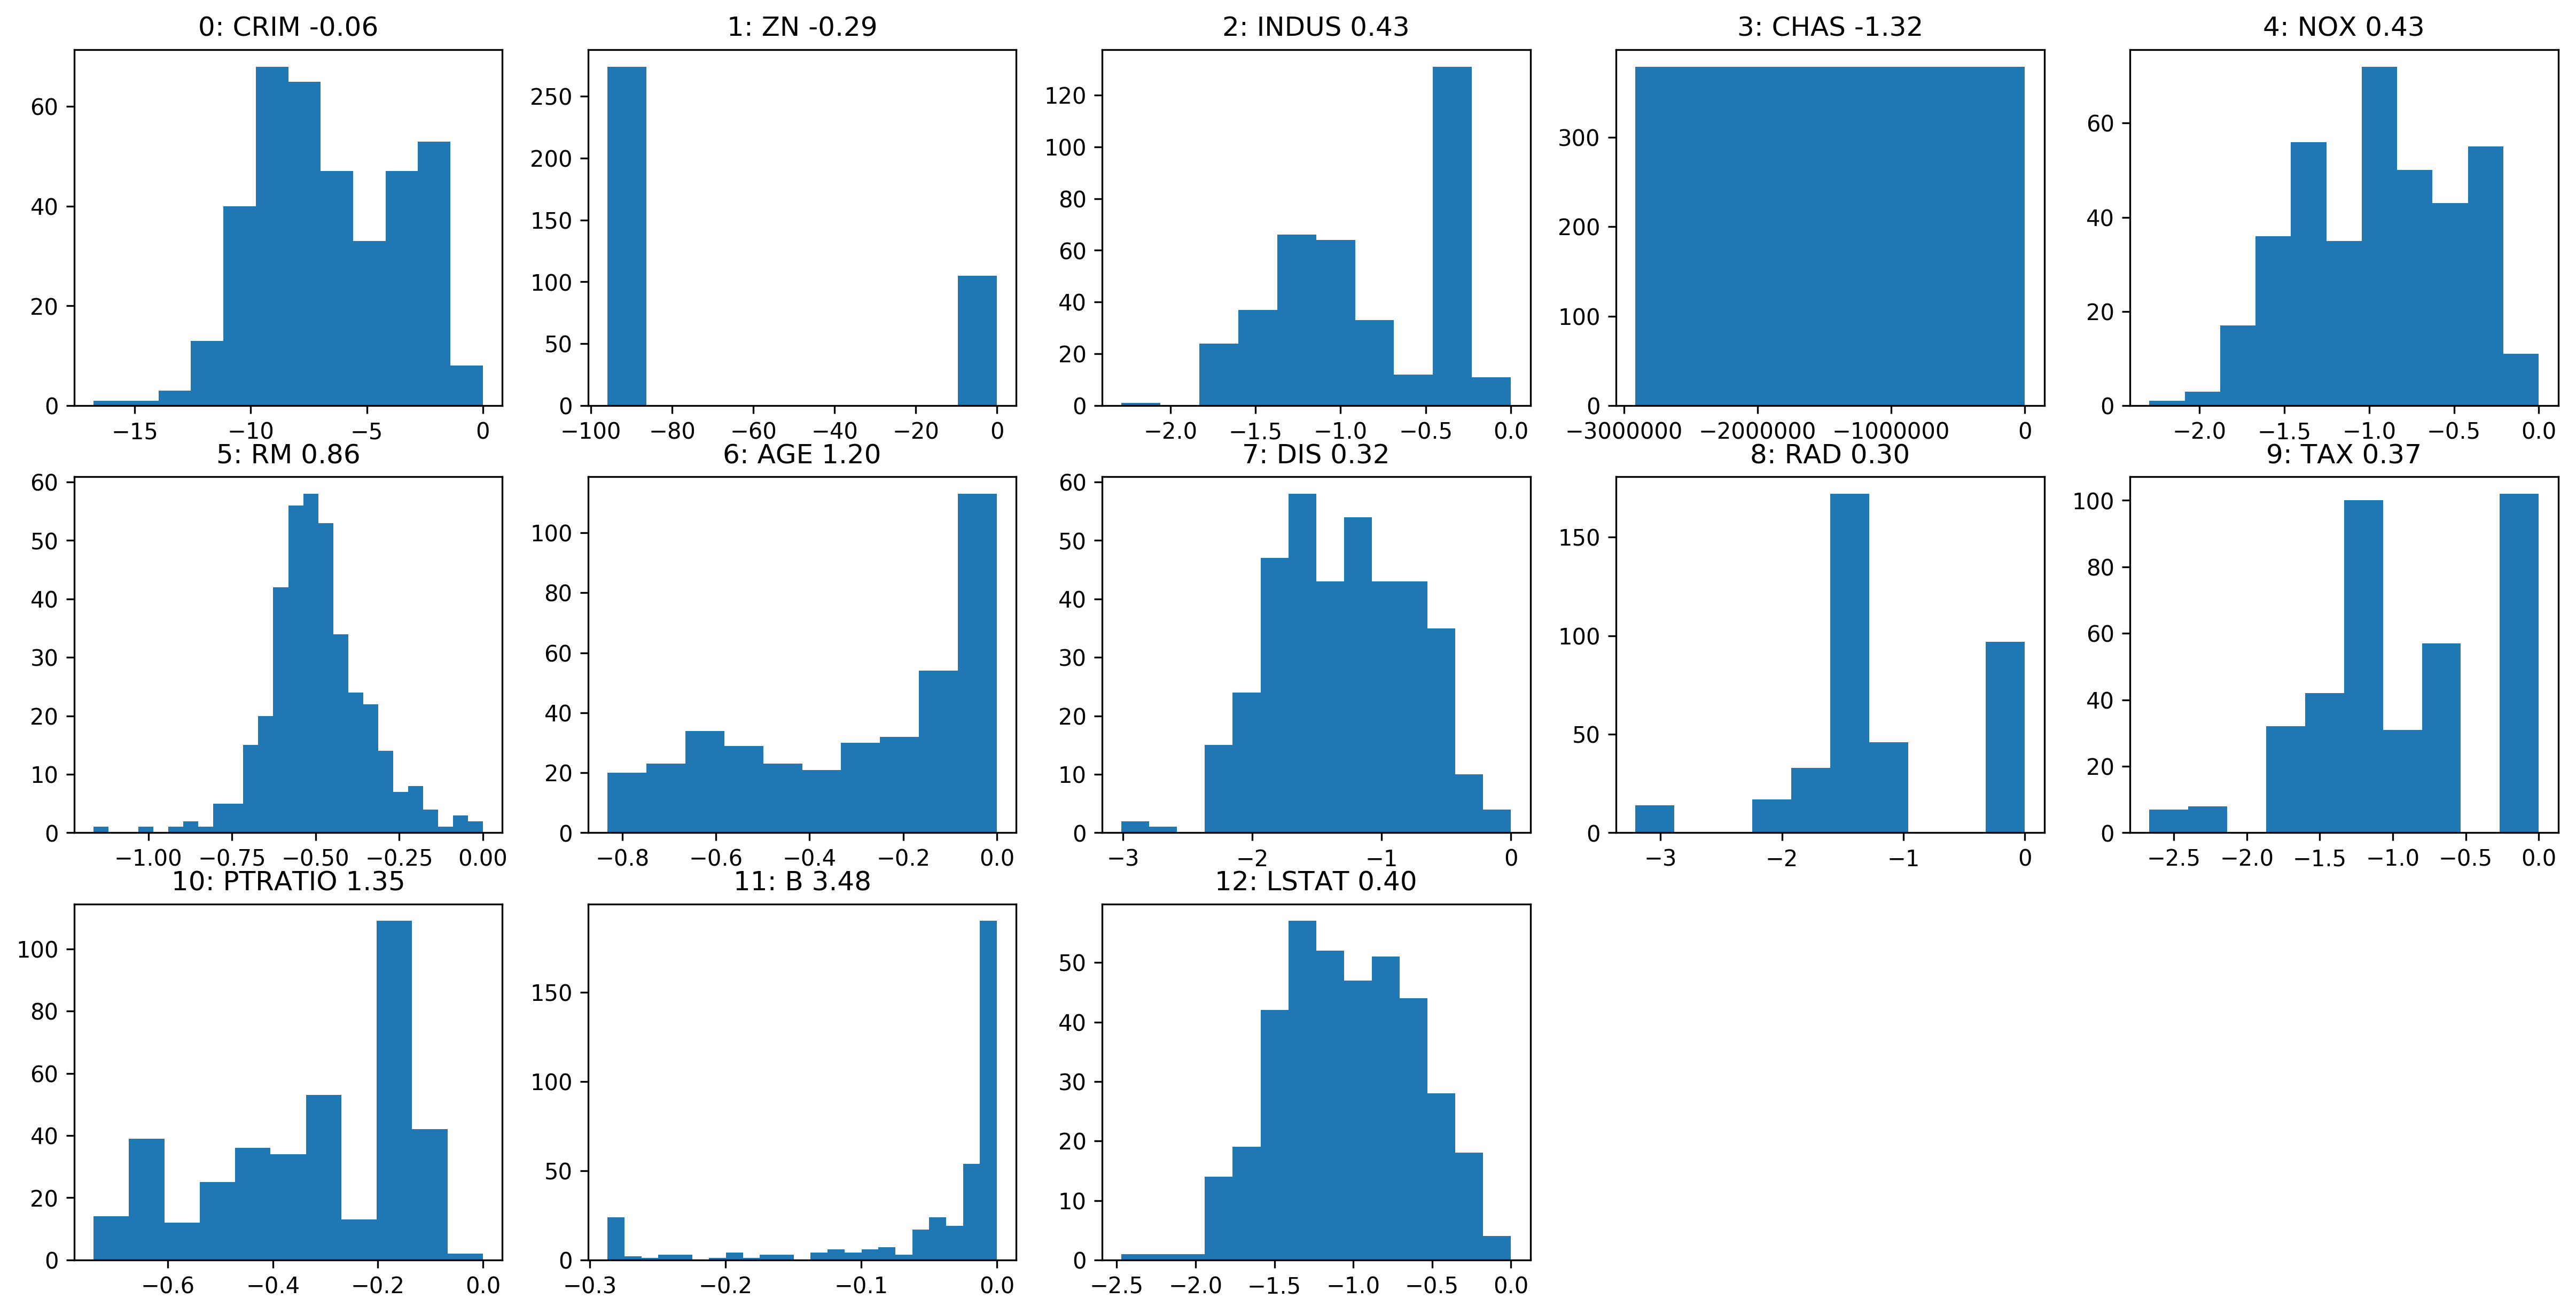

In [32]:
from scipy import stats
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
X_bc = []
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    x, lambda_x = stats.boxcox(X_train_mm[:, i] + 1e-5)
    X_bc.append(x)
    ax.hist(x, bins="auto")
    ax.set_title("{}: {} {:.2f}".format(i, boston.feature_names[i], lambda_x))

In [33]:
X_bc = np.array(X_bc).T

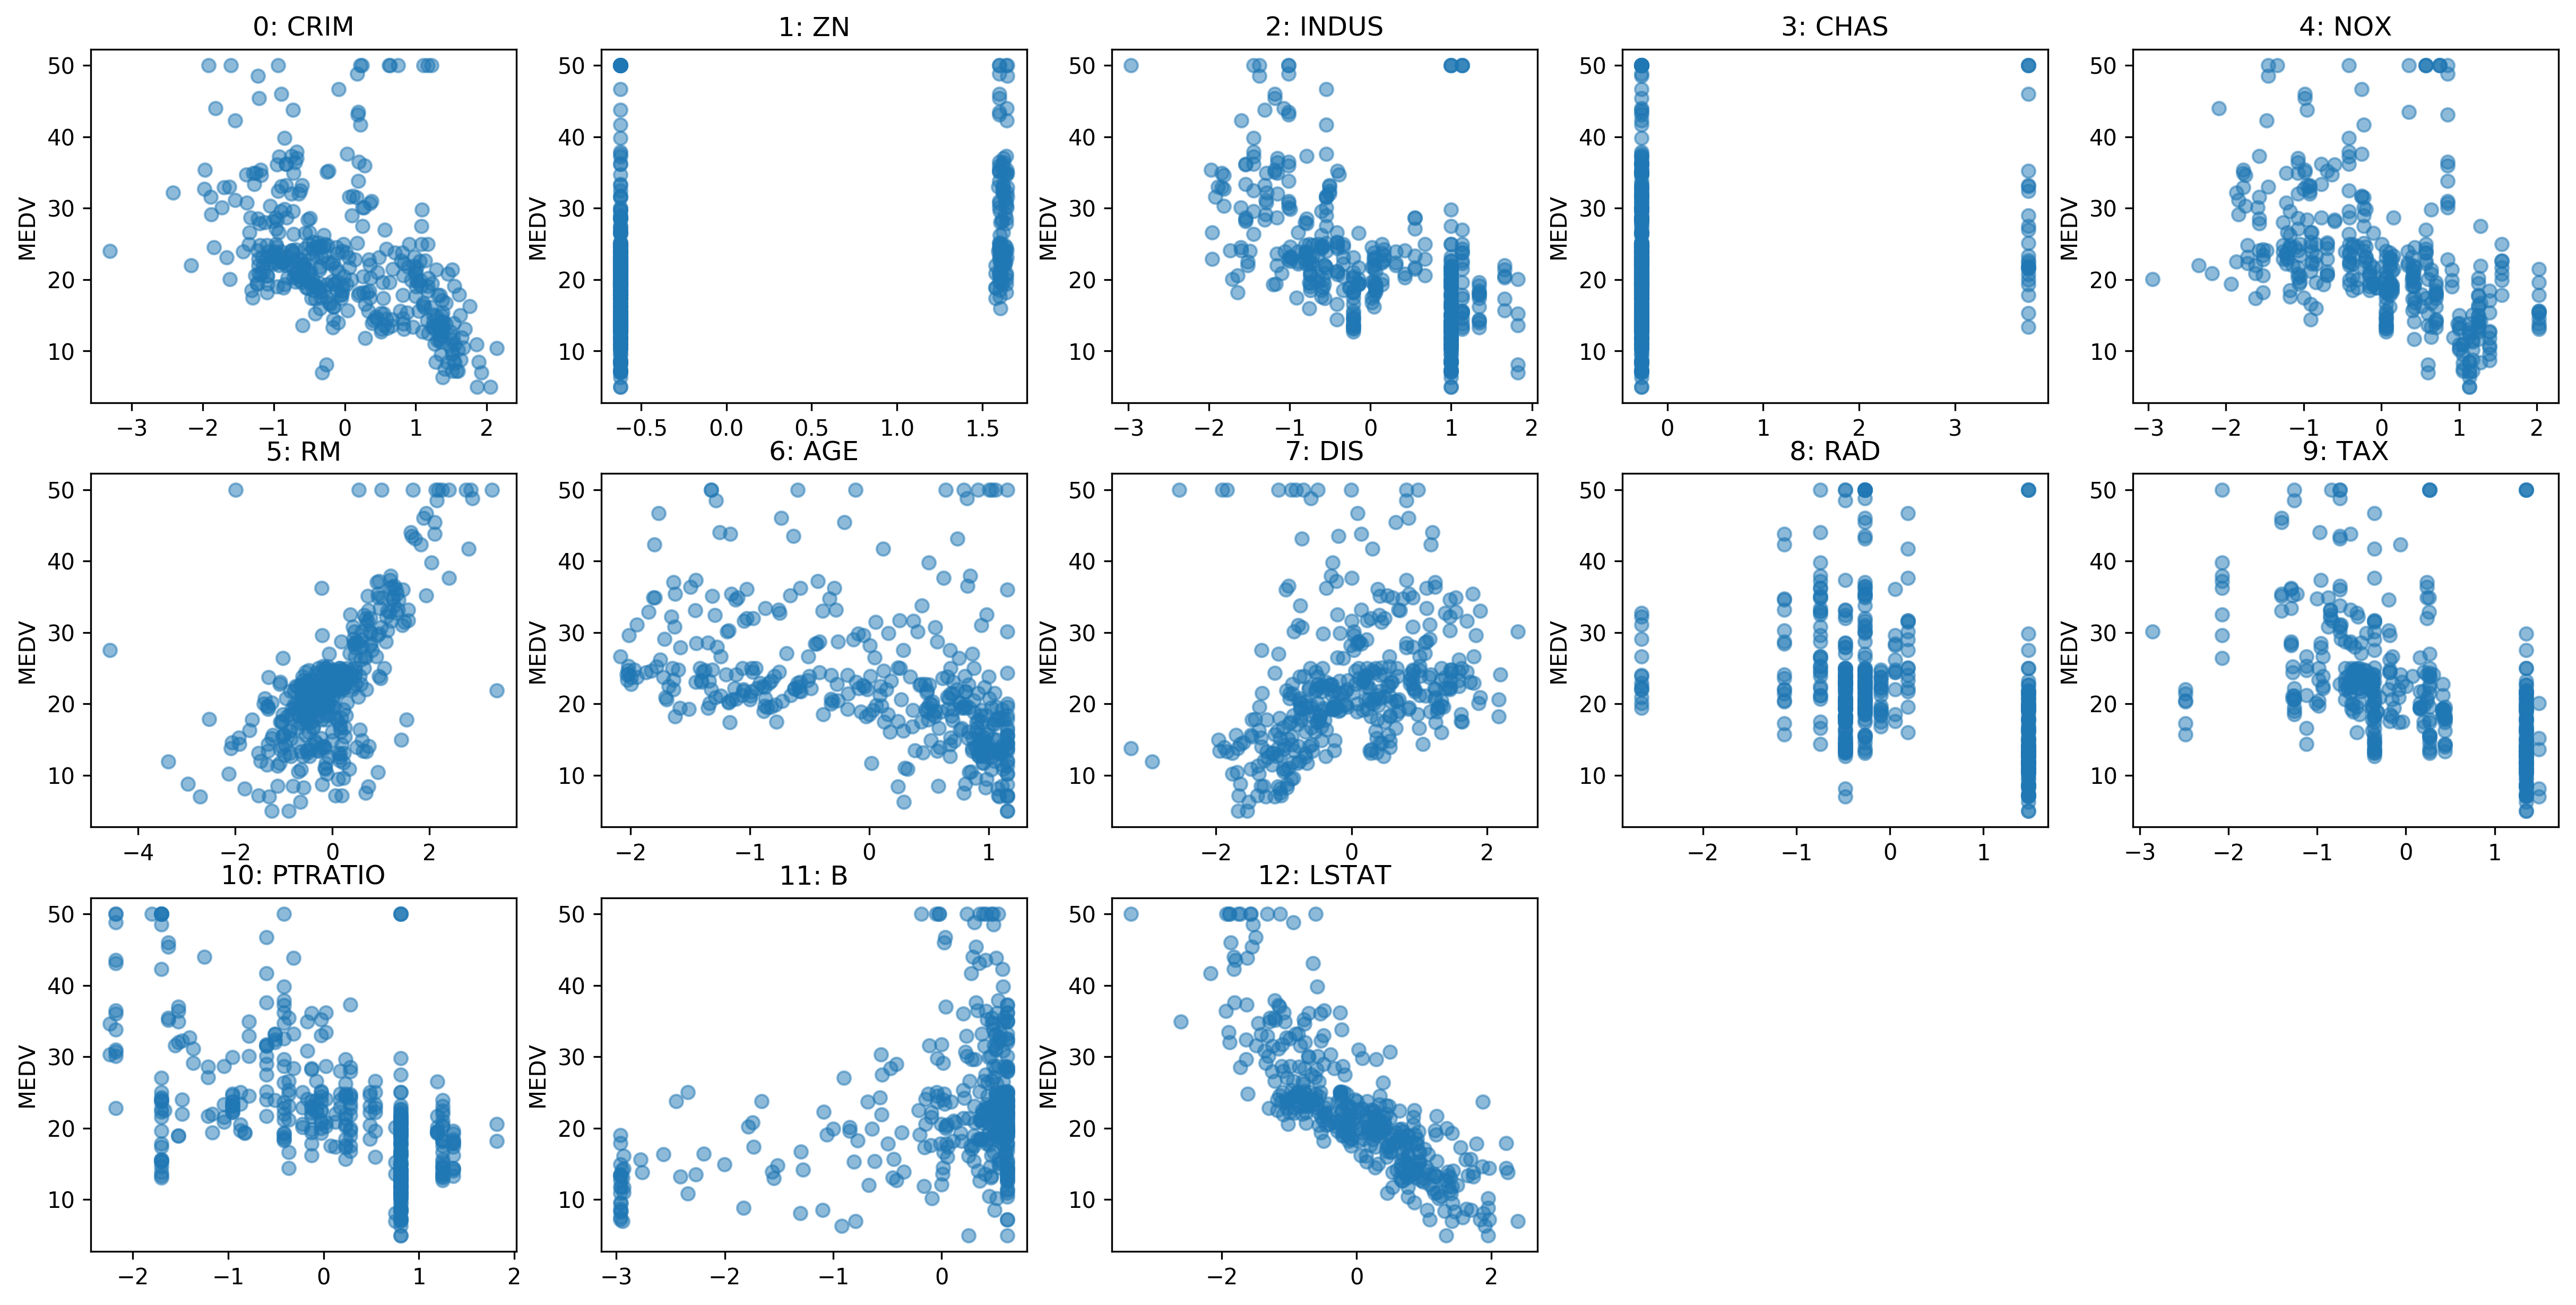

In [34]:
X_bc_scaled = StandardScaler().fit_transform(X_bc)
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X_bc_scaled[:, i], y_train, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [35]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.71718655233314066, 0.12521148650633437)

In [36]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
print(np.mean(scores), np.std(scores))


0.717890469473 0.126954472509


In [37]:
scores = cross_val_score(RidgeCV(), X_bc_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.75938668786977215, 0.081102768502434197)

In [38]:
ridge = RidgeCV().fit(X_train_scaled, y_train)
ridge_bc = RidgeCV().fit(X_bc_scaled, y_train)

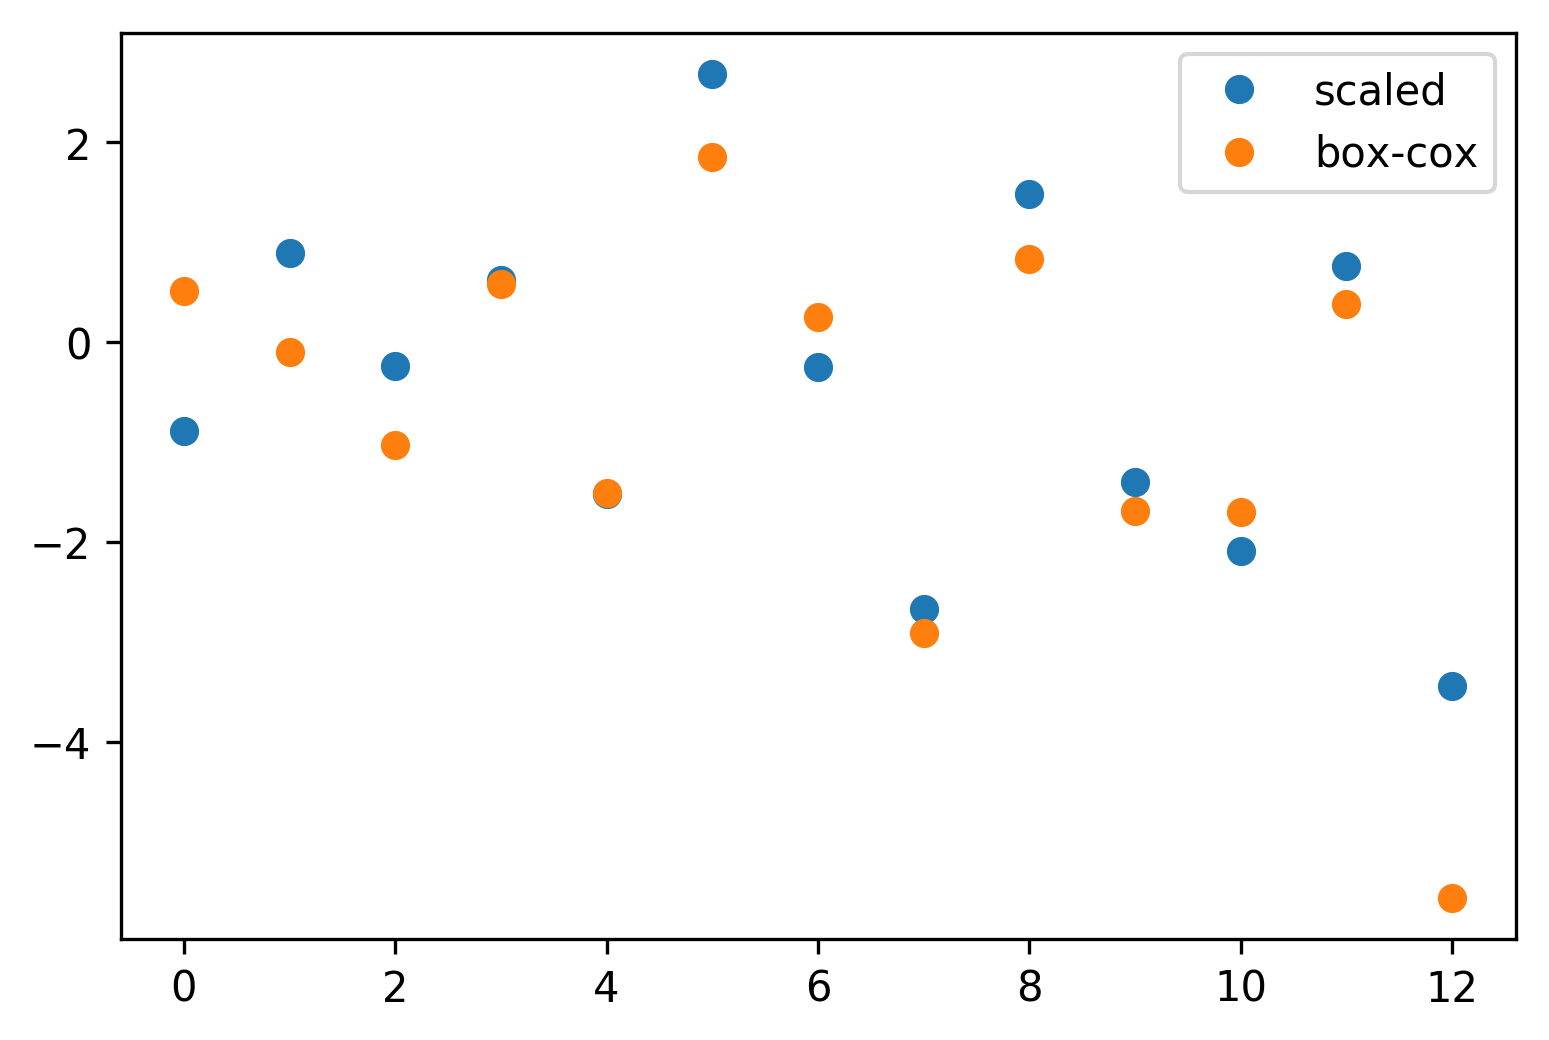

In [39]:
plt.plot(ridge.coef_, 'o', label="scaled")
plt.plot(ridge_bc.coef_, 'o', label="box-cox")
plt.legend()

In [40]:
# Categorical Variables

In [41]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhatten', 'Queens', 'Manhatten', 'Brooklyn', 'Brooklyn', 'Bronx']})
df

boro  salary
0  Manhatten     103
1     Queens      89
2  Manhatten     142
3   Brooklyn      54
4   Brooklyn      63
5      Bronx     219

In [42]:
pd.get_dummies(df)

salary  boro_Bronx  boro_Brooklyn  boro_Manhatten  boro_Queens
0     103         0.0            0.0             1.0          0.0
1      89         0.0            0.0             0.0          1.0
2     142         0.0            0.0             1.0          0.0
3      54         0.0            1.0             0.0          0.0
4      63         0.0            1.0             0.0          0.0
5     219         1.0            0.0             0.0          0.0

In [43]:
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': [0, 1,0, 2, 2, 3]})
df

boro  salary
0     0     103
1     1      89
2     0     142
3     2      54
4     2      63
5     3     219

In [44]:
pd.get_dummies(df, columns=['boro'])

salary  boro_0  boro_1  boro_2  boro_3
0     103     1.0     0.0     0.0     0.0
1      89     0.0     1.0     0.0     0.0
2     142     1.0     0.0     0.0     0.0
3      54     0.0     0.0     1.0     0.0
4      63     0.0     0.0     1.0     0.0
5     219     0.0     0.0     0.0     1.0

In [45]:
df2 = pd.DataFrame({'salary': [73, 98, 204, 54],
                   'boro': ['Staten Island', 'Manhatten', 'Brooklyn', 'Bronx']})
df2

boro  salary
0  Staten Island      73
1      Manhatten      98
2       Brooklyn     204
3          Bronx      54

In [46]:
pd.get_dummies(df2)

salary  boro_Bronx  boro_Brooklyn  boro_Manhatten  boro_Staten Island
0      73         0.0            0.0             0.0                 1.0
1      98         0.0            0.0             1.0                 0.0
2     204         0.0            1.0             0.0                 0.0
3      54         1.0            0.0             0.0                 0.0

In [47]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhatten', 'Queens', 'Manhatten', 'Brooklyn', 'Brooklyn', 'Bronx']})
df.boro = df.boro.astype("category", categories=['Manhatten', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])
pd.get_dummies(df)

salary  boro_Manhatten  boro_Queens  boro_Brooklyn  boro_Bronx  \
0     103             1.0          0.0            0.0         0.0   
1      89             0.0          1.0            0.0         0.0   
2     142             1.0          0.0            0.0         0.0   
3      54             0.0          0.0            1.0         0.0   
4      63             0.0          0.0            1.0         0.0   
5     219             0.0          0.0            0.0         1.0   

   boro_Staten Island  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
5                 0.0

In [48]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': [0, 1, 0, 2, 2, 3]})
X = df.values
ohe = OneHotEncoder(categorical_features=[0]).fit(X)
ohe.transform(X).toarray()

array([[   1.,    0.,    0.,    0.,  103.],
       [   0.,    1.,    0.,    0.,   89.],
       [   1.,    0.,    0.,    0.,  142.],
       [   0.,    0.,    1.,    0.,   54.],
       [   0.,    0.,    1.,    0.,   63.],
       [   0.,    0.,    0.,    1.,  219.]])

# Feature Engineering

interesting random states

18 0.486666666667 0.986666666667
42 0.553333333333 0.986666666667
44 0.526666666667 1.0
54 0.56 1.0
67 0.506666666667 1.0
70 0.586666666667 1.0
79 0.673333333333 1.0
96 0.526666666667 1.0
161 0.486666666667 1.0
174 0.566666666667 1.0
175 0.62 1.0

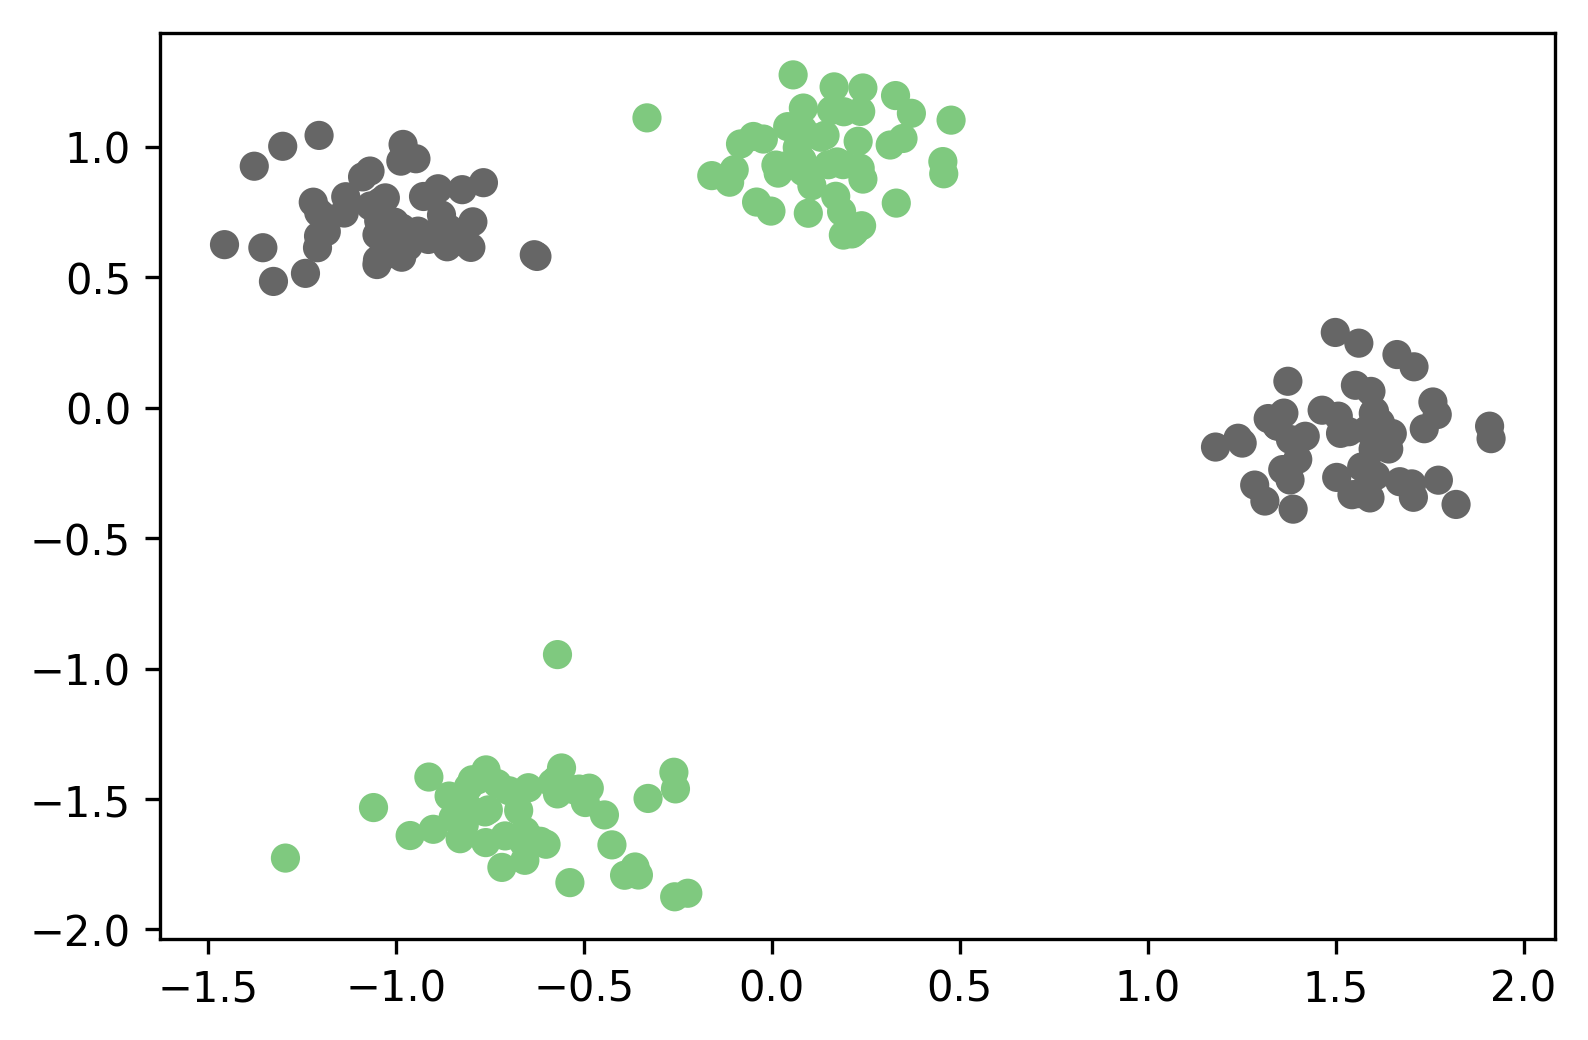

In [49]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
X, y = make_blobs(n_samples=200, centers=4, random_state=42)
X = scale(X)
y = y % 2
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')

In [51]:
from sklearn.linear_model import LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegressionCV().fit(X_train, y_train)
logreg.score(X_test, y_test)

0.5

(-2, 1.8)

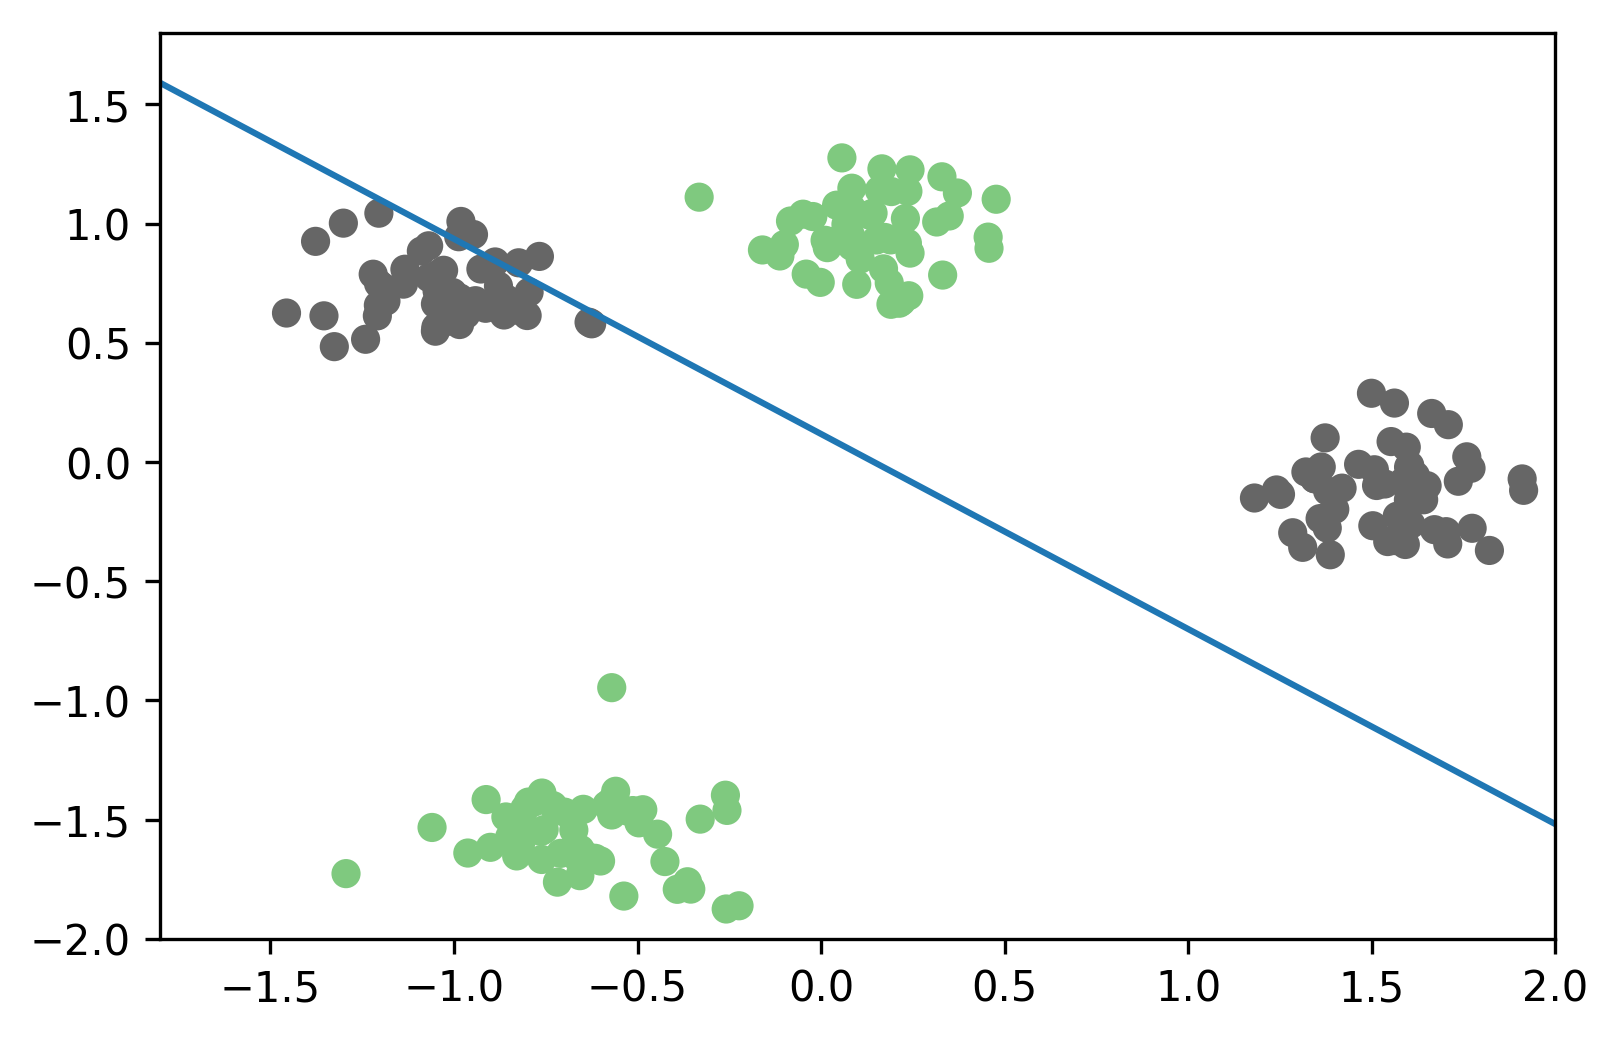

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
line = np.linspace(-3, 3, 100)
coef = logreg.coef_.ravel()

plt.plot(line, -(coef[0] * line + logreg.intercept_) / coef[1])

plt.xlim(-1.8, 2)
plt.ylim(-2, 1.8)

In [53]:
# Same as PolynomialFeatures(order=2, interactions_only=True)
X_interaction = np.hstack([X, X[:, 0:1] * X[:, 1:]])

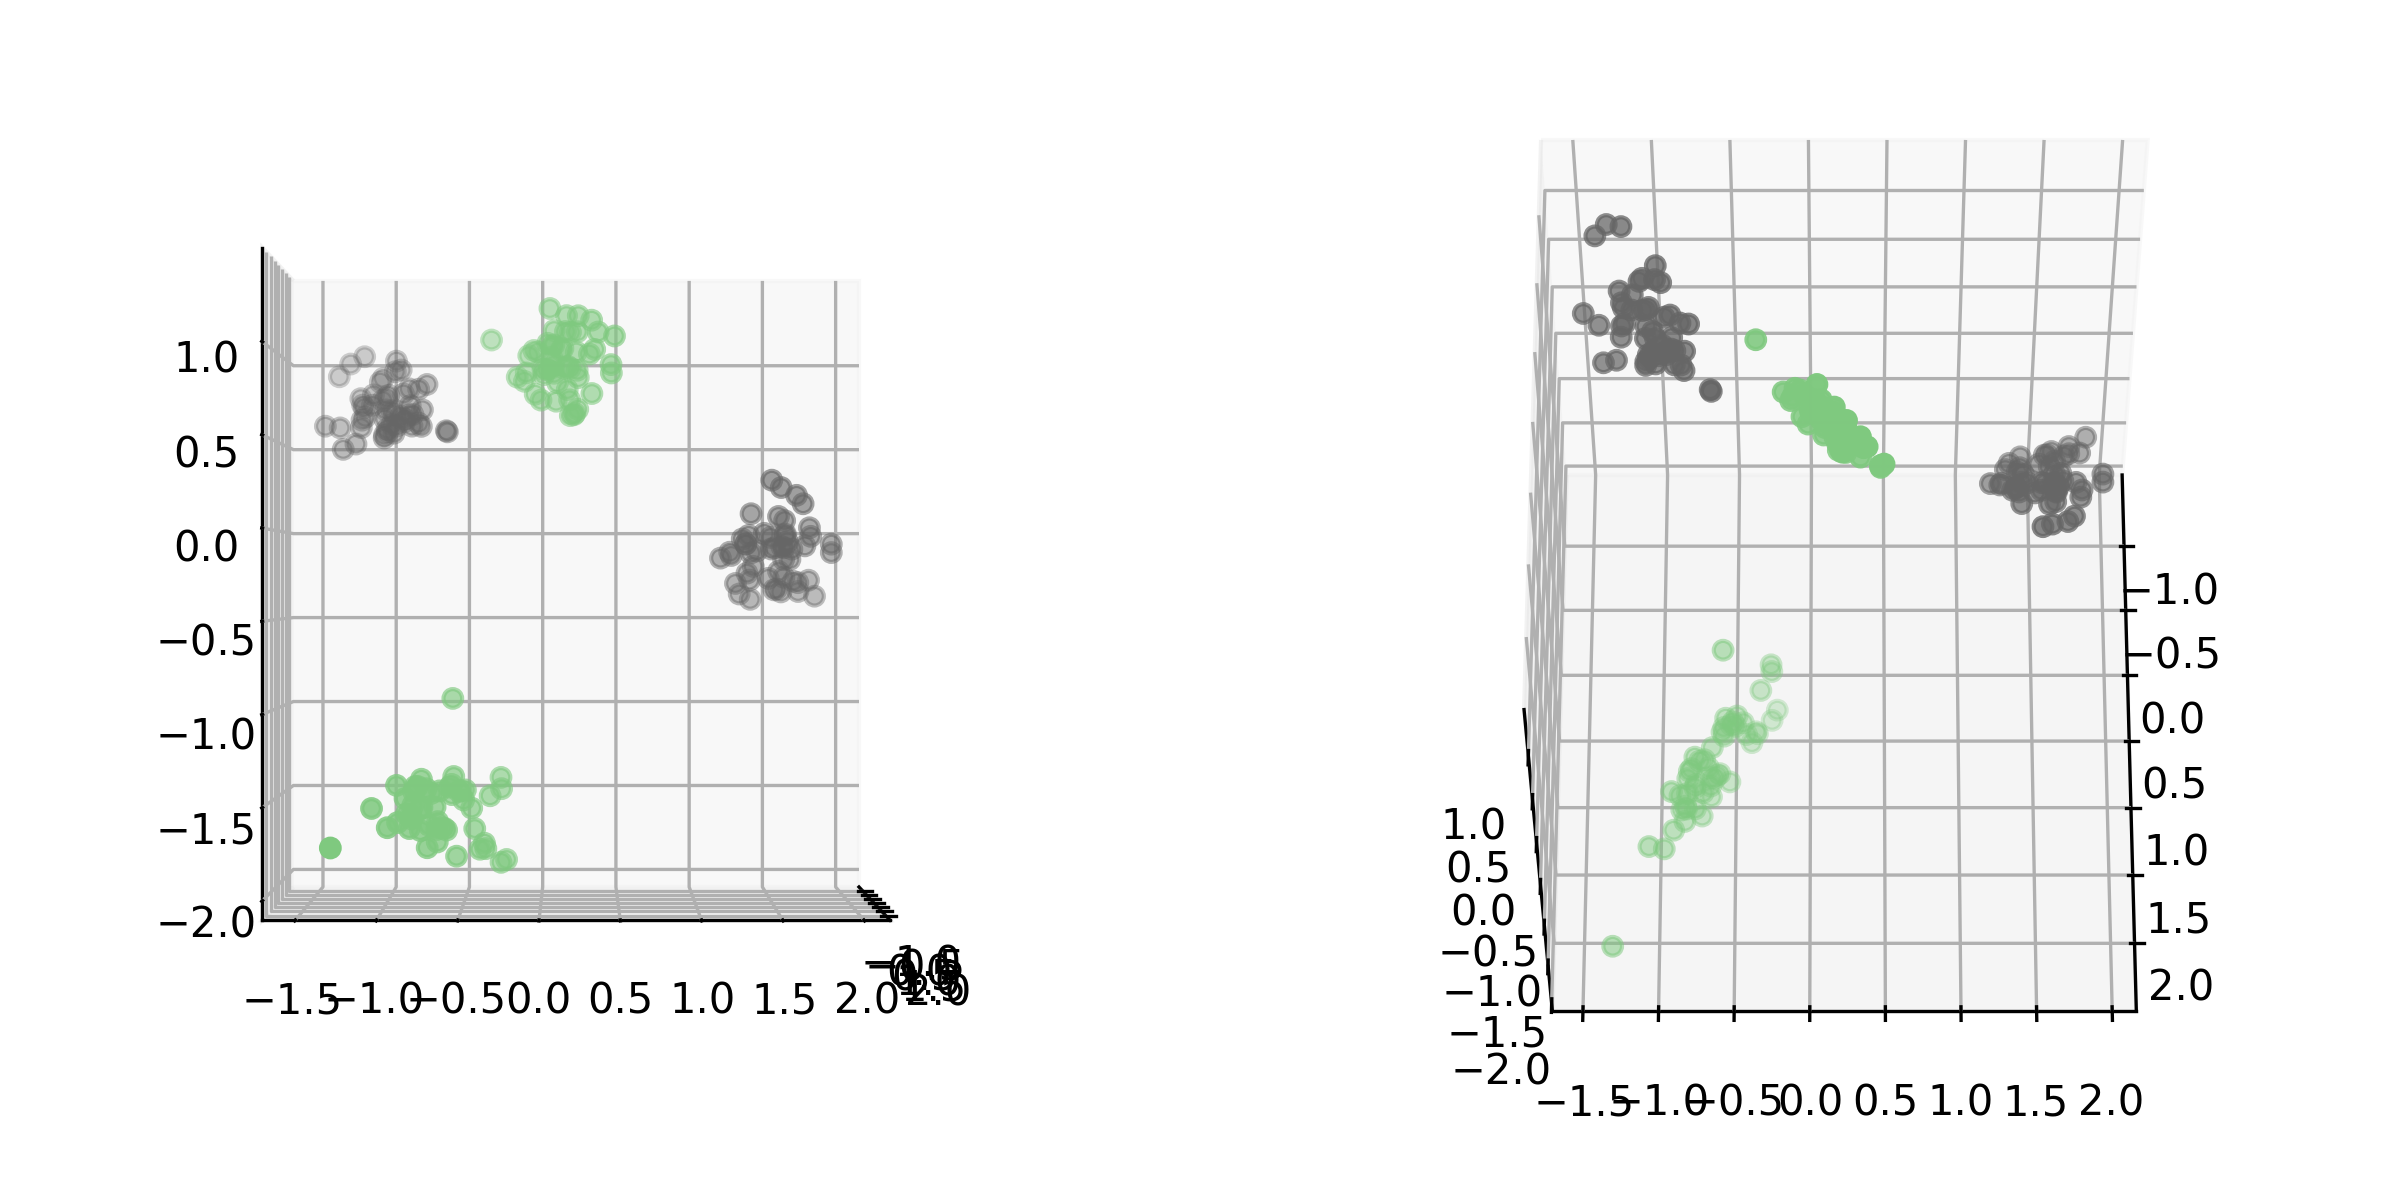

In [54]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_interaction[:, 2], X_interaction[:, 0], X_interaction[:, 1], c=y, cmap="Accent")
ax.view_init(elev=0., azim=0)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_interaction[:, 2], X_interaction[:, 0], X_interaction[:, 1], c=y, cmap="Accent")
ax.view_init(elev=60., azim=0)

In [55]:
X_i_train, X_i_test, y_train, y_test = train_test_split(X_interaction, y, random_state=0)
logreg3 = LogisticRegressionCV().fit(X_i_train, y_train)
logreg3.score(X_i_test, y_test)

0.95999999999999996

(-2, 1.8)

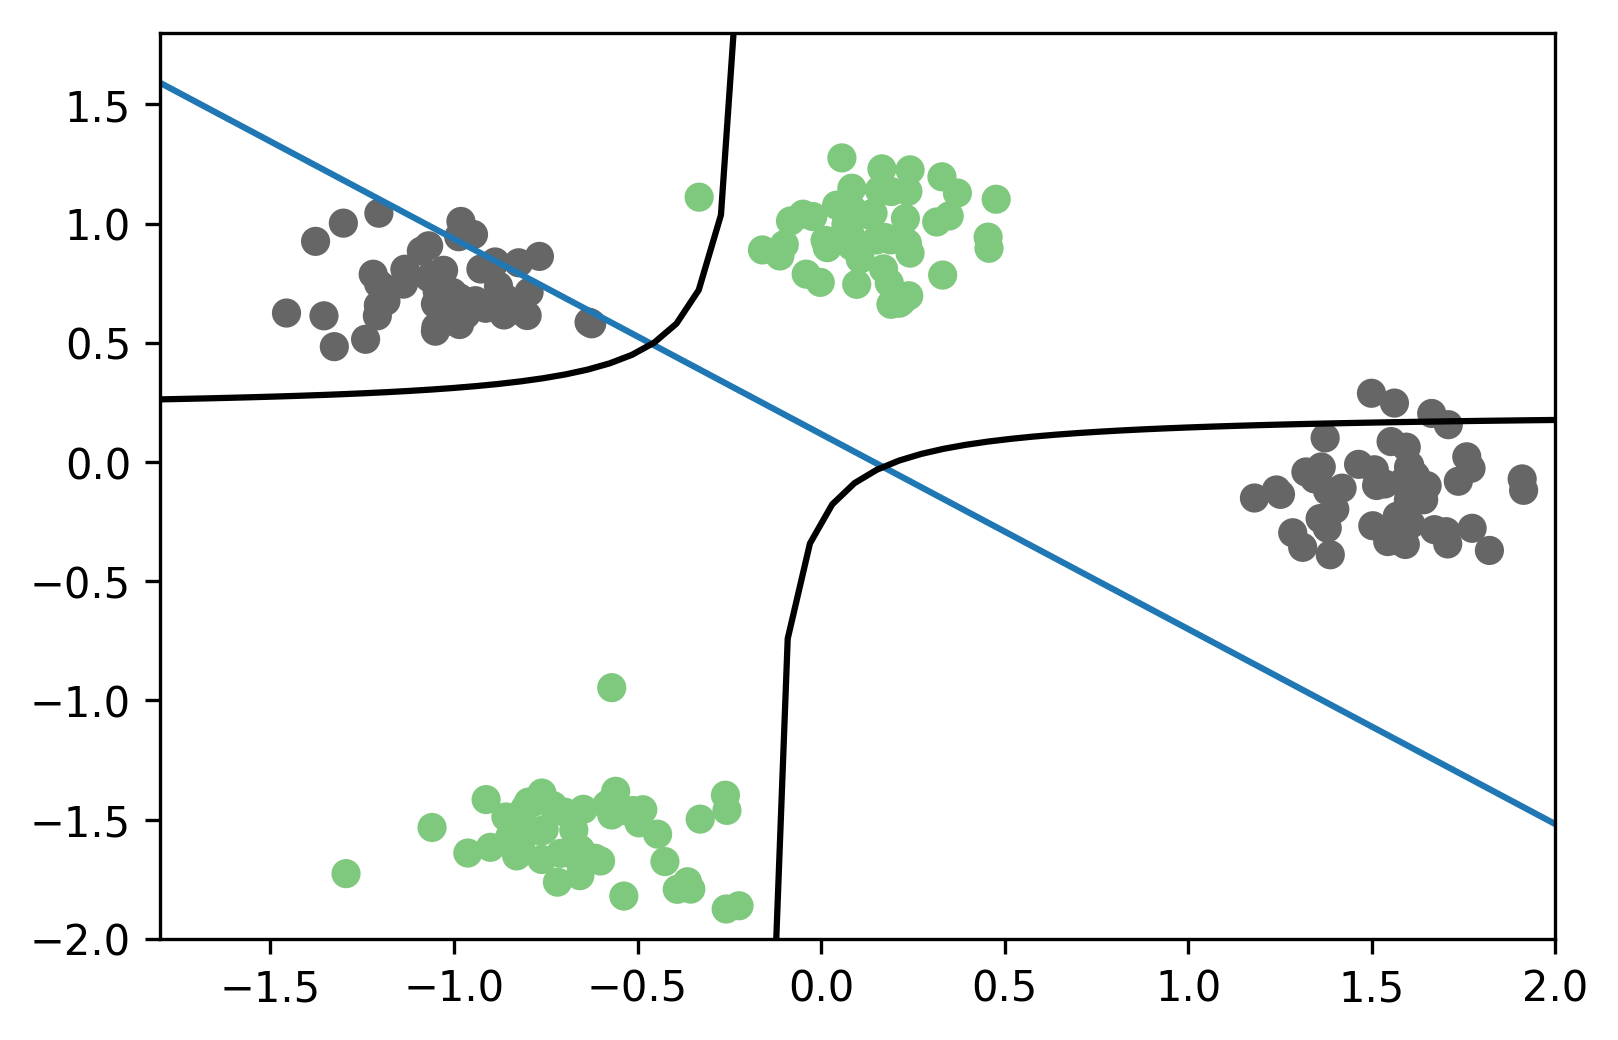

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
line = np.linspace(-3, 3, 100)
coef = logreg.coef_.ravel()
coef3 = logreg3.coef_.ravel()
plt.plot(line, -(coef[0] * line + logreg.intercept_) / coef[1])
curve = -(coef3[0] * line + logreg3.intercept_) / (coef3[1] + line * coef3[2])
mask = coef3[1] + line * coef3[2] > 0
plt.plot(line[mask], curve[mask], c='k')
plt.plot(line[~mask], curve[~mask], c='k')
plt.xlim(-1.8, 2)
plt.ylim(-2, 1.8)

# Discrete interactions

In [57]:
df = pd.DataFrame({'gender': ['M', 'F', 'M', 'F', 'F'],
                   'age': [14, 16, 12, 25, 22],
                   'spend$': [70, 12, 42, 64, 93],
                   'articles_bought': [5, 10, 2, 1, 1],
                   'time_online': [269, 1522, 235, 63, 21]
                  })
df

age  articles_bought gender  spend$  time_online
0   14                5      M      70          269
1   16               10      F      12         1522
2   12                2      M      42          235
3   25                1      F      64           63
4   22                1      F      93           21

In [58]:
dummies = pd.get_dummies(df)
dummies

age  articles_bought  spend$  time_online  gender_F  gender_M
0   14                5      70          269       0.0       1.0
1   16               10      12         1522       1.0       0.0
2   12                2      42          235       0.0       1.0
3   25                1      64           63       1.0       0.0
4   22                1      93           21       1.0       0.0

In [59]:
[x + "_F" for x in dummies.columns]

['age_F',
 'articles_bought_F',
 'spend$_F',
 'time_online_F',
 'gender_F_F',
 'gender_M_F']

In [60]:
df_f = dummies.multiply(dummies.gender_F, axis='rows')
df_f = df_f.rename(columns=lambda x: x + "_F")

df_m = dummies.multiply(dummies.gender_M, axis='rows')
df_m = df_m.rename(columns=lambda x: x + "_M")

In [61]:
res = pd.concat([df_m, df_f], axis=1).drop(["gender_F_M", "gender_M_F"], axis=1)
res

age_M  articles_bought_M  spend$_M  time_online_M  gender_M_M  age_F  \
0   14.0                5.0      70.0          269.0         1.0    0.0   
1    0.0                0.0       0.0            0.0         0.0   16.0   
2   12.0                2.0      42.0          235.0         1.0    0.0   
3    0.0                0.0       0.0            0.0         0.0   25.0   
4    0.0                0.0       0.0            0.0         0.0   22.0   

   articles_bought_F  spend$_F  time_online_F  gender_F_F  
0                0.0       0.0            0.0         0.0  
1               10.0      12.0         1522.0         1.0  
2                0.0       0.0            0.0         0.0  
3                1.0      64.0           63.0         1.0  
4                1.0      93.0           21.0         1.0

# Polynomial Features

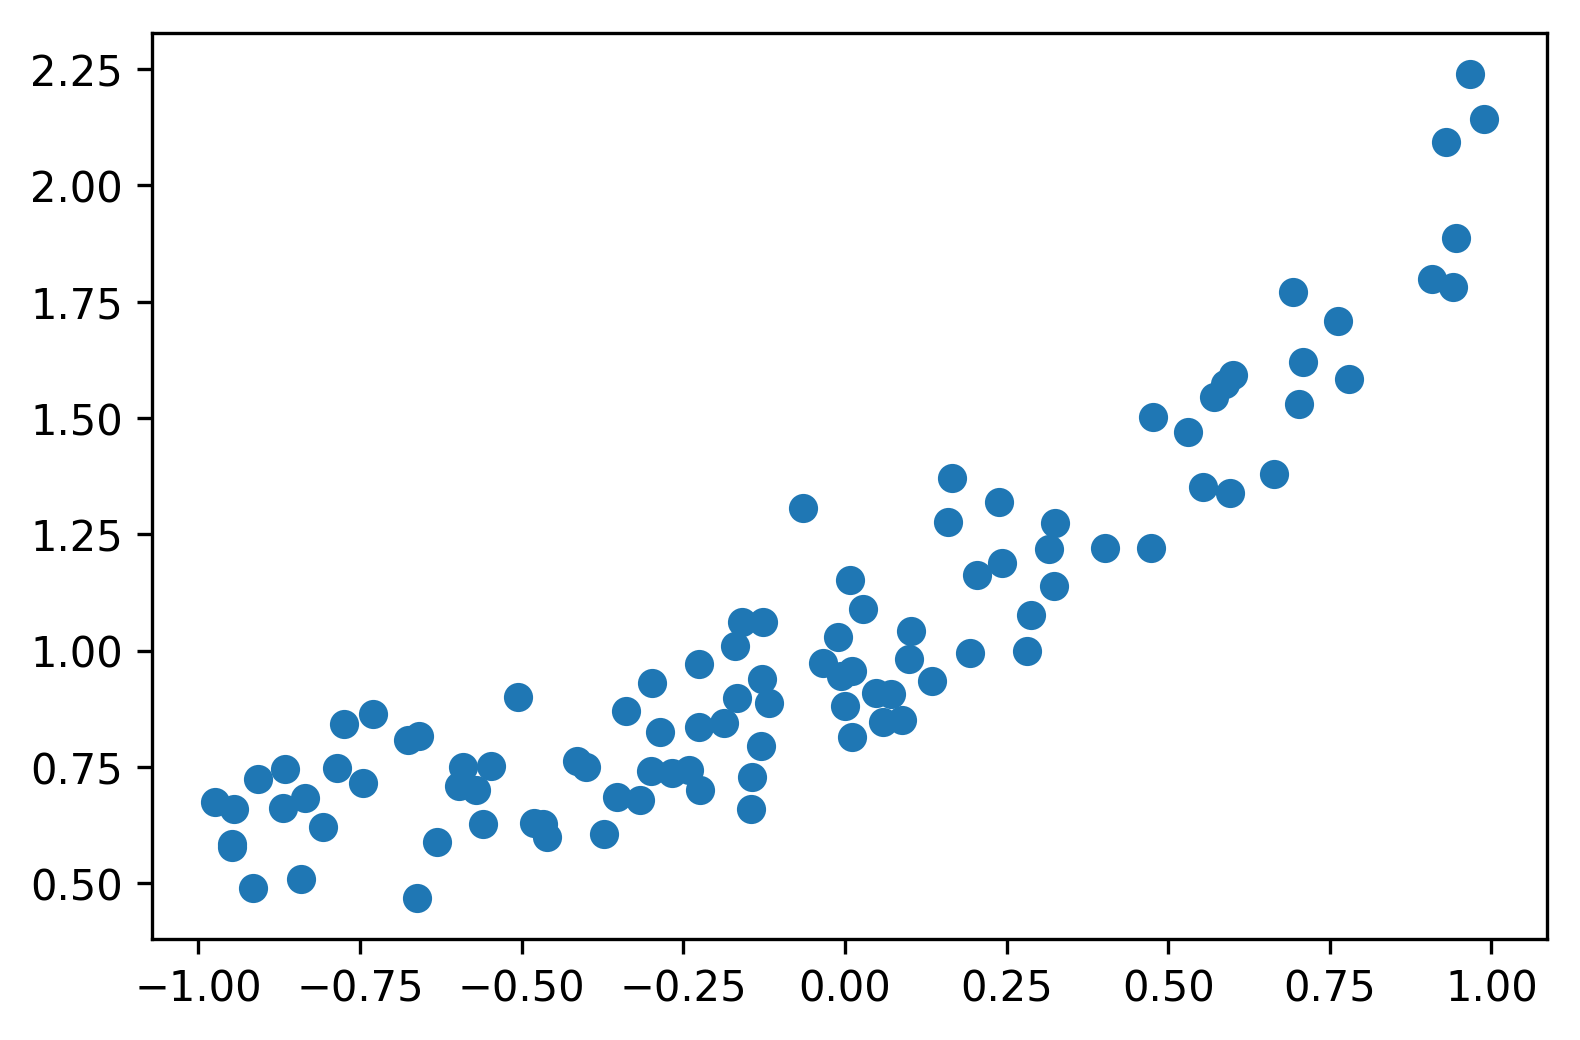

In [68]:
rng = np.random.RandomState(2)
x = rng.uniform(-1, 1, size=(100,))
X = x.reshape(-1, 1)
x_noisy = x + rng.normal(scale=0.1, size=x.shape)
coef = rng.normal(size=3)
y = coef[0] * x_noisy ** 2 + coef[1] * x_noisy + coef[2] + rng.normal(scale=0.1, size=x.shape)
plt.plot(x, y, 'o')

0.76332391526170273

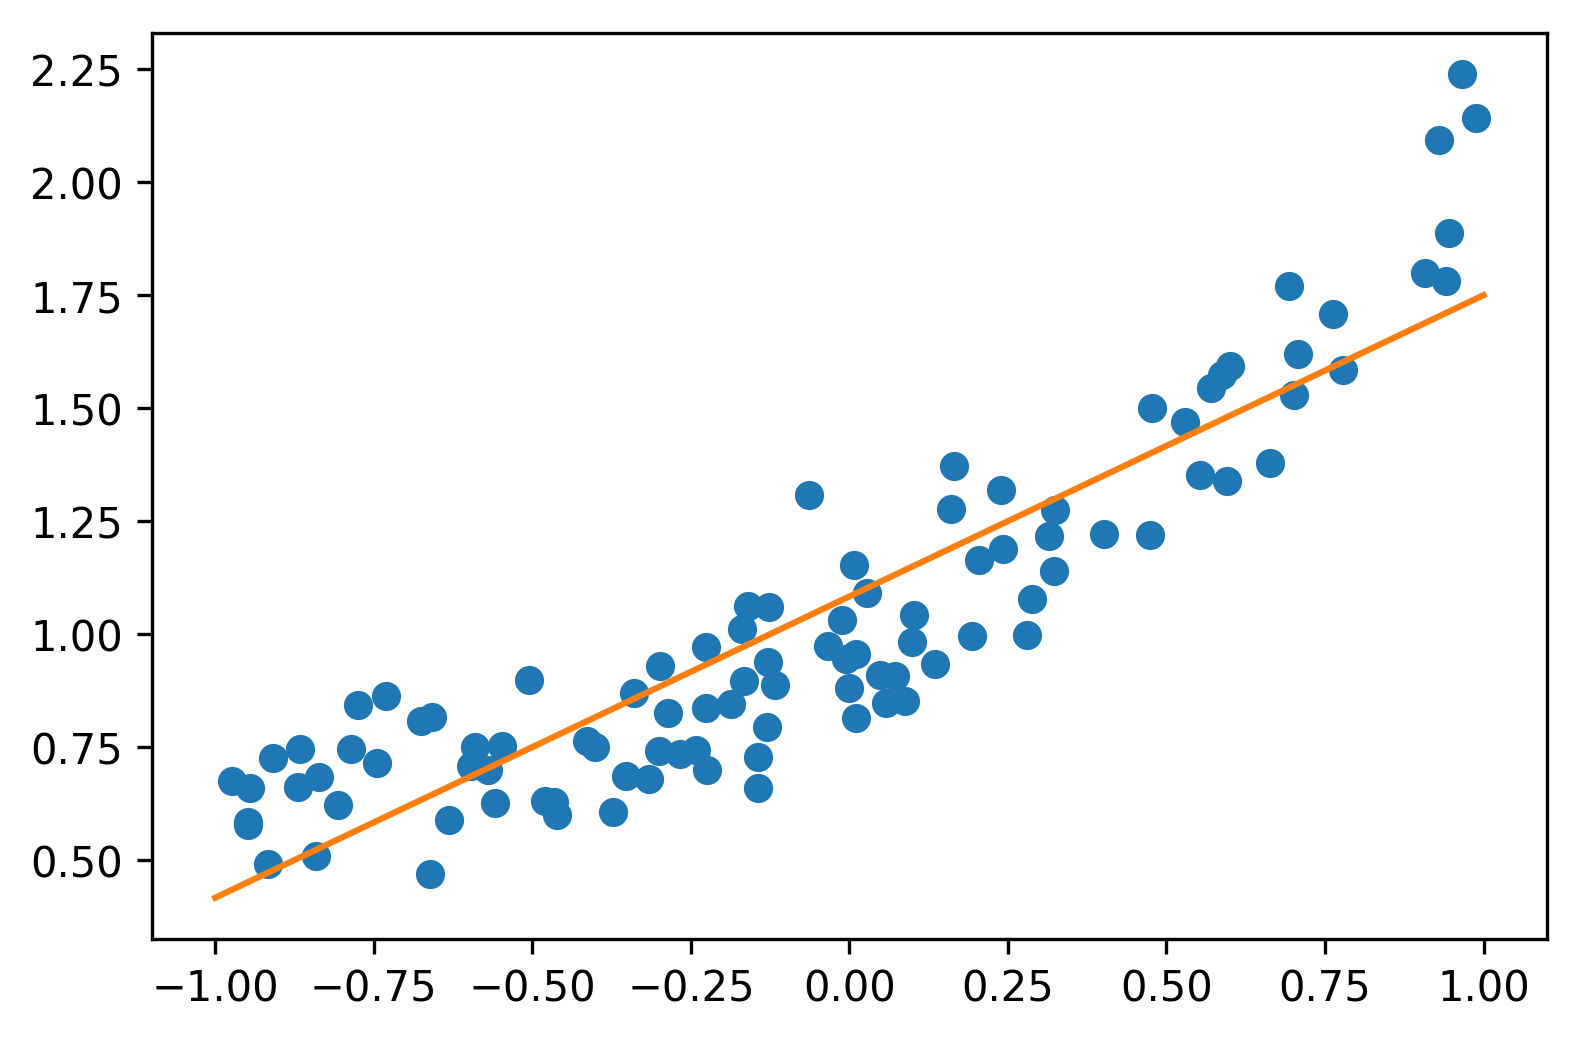

In [69]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
line = np.linspace(-1, 1, 100).reshape(-1, 1)
plt.plot(x, y, 'o')
plt.plot(line, lr.predict(line))
lr.score(X_test, y_test)

0.83367862697542183

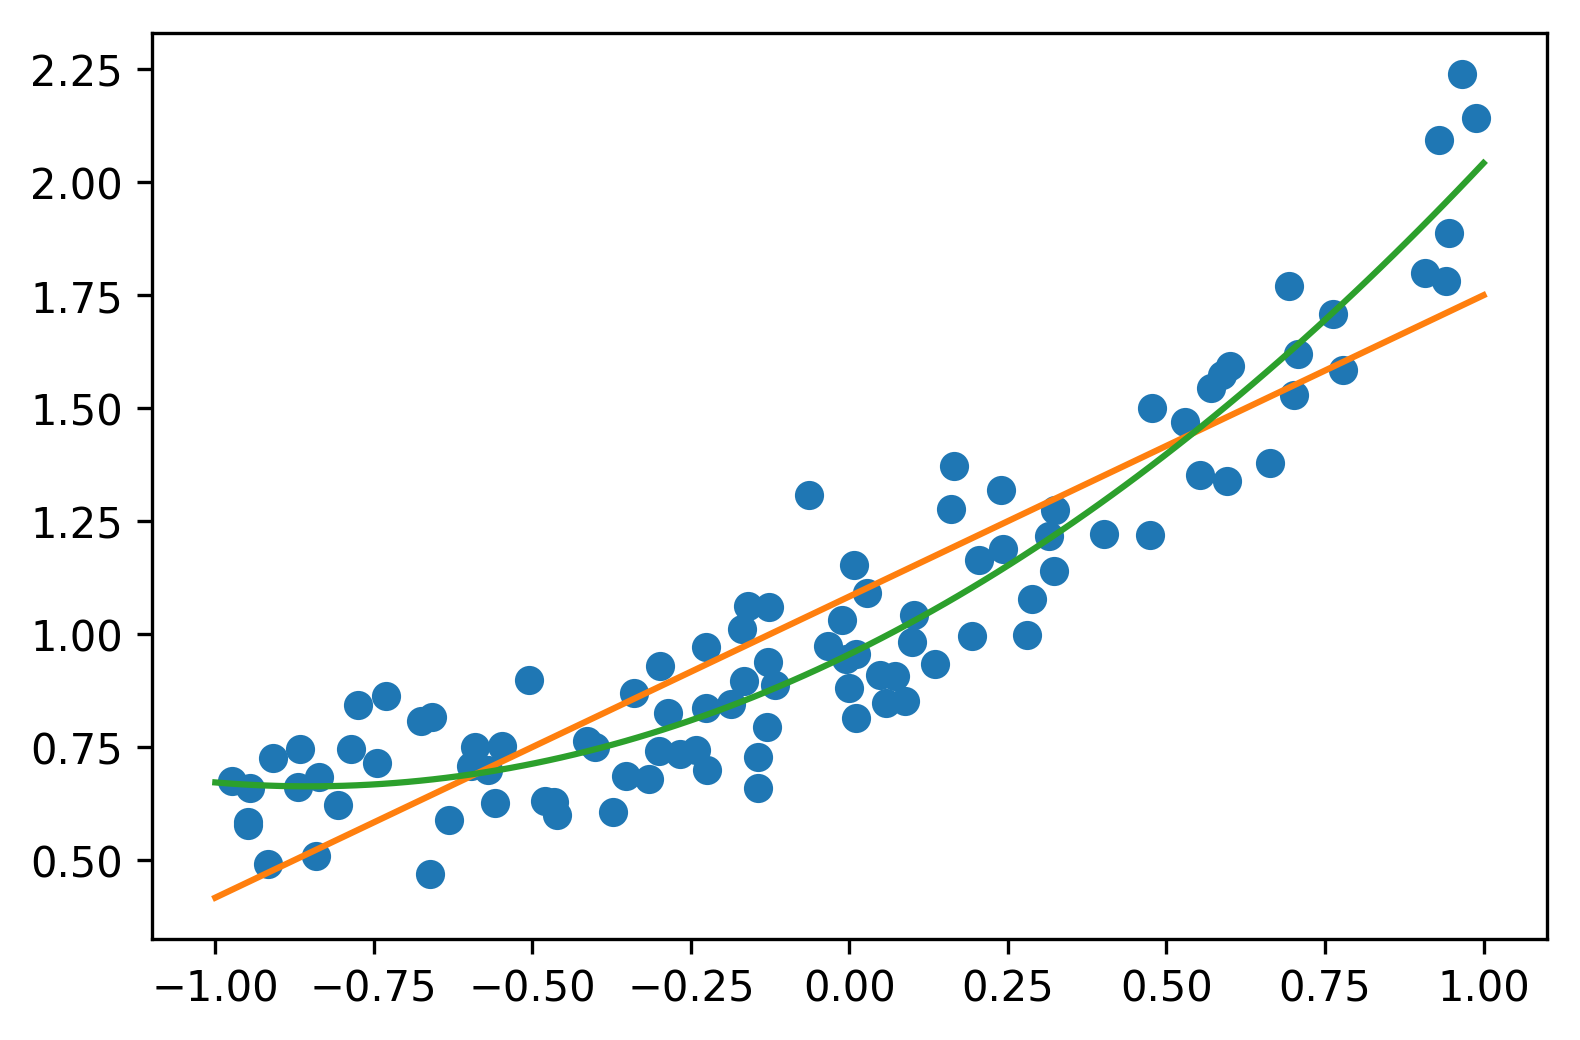

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly_lr = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())

poly_lr.fit(X_train, y_train)

plt.plot(x, y, 'o')
plt.plot(line, lr.predict(line))
plt.plot(line, poly_lr.predict(line))
poly_lr.score(X_test, y_test)

In [71]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_bc_poly = poly.fit_transform(X_bc_scaled)
print(X_bc_scaled.shape)
print(X_bc_poly.shape)

(379, 13)
(379, 105)


In [73]:
scores = cross_val_score(RidgeCV(), X_bc_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.75938668786977215, 0.081102768502434197)

In [74]:
scores = cross_val_score(RidgeCV(), X_bc_poly, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.86528575688853915, 0.080389451676537382)

In [75]:
from sklearn.linear_model import LassoCV, Lasso
scores = cross_val_score(LassoCV(cv=10), X_bc_poly, y_train, cv=10)
np.mean(scores), np.std(scores)

/home/andy/checkout/scikit-learn/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/andy/checkout/scikit-learn/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/andy/checkout/scikit-learn/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/andy/checkout/scikit-learn/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting dat

(0.84503569203525009, 0.10124555041294417)

In [165]:
lasso = LassoCV(max_iter=10000, cv=10).fit(X_bc_poly, y_train)

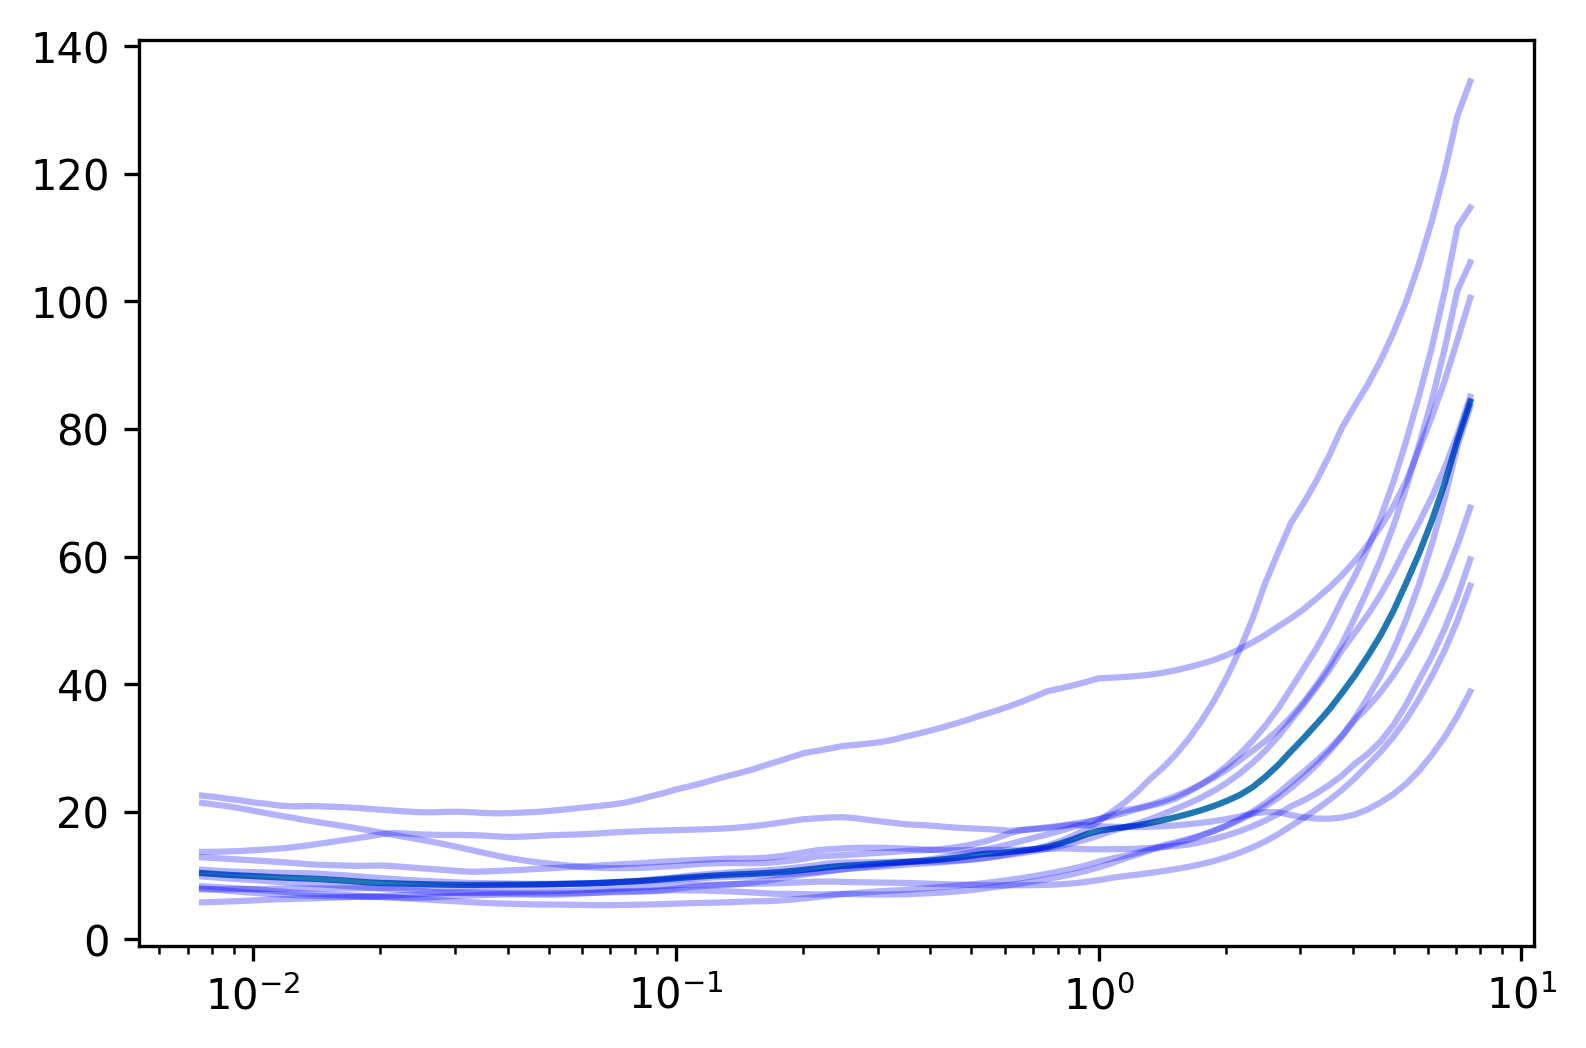

In [169]:
mean = np.mean(lasso.mse_path_, axis=1)
plt.plot(lasso.alphas_, np.median(lasso.mse_path_, axis=1))
plt.plot(lasso.alphas_, lasso.mse_path_, alpha=.3, c='b')
plt.xscale("log")

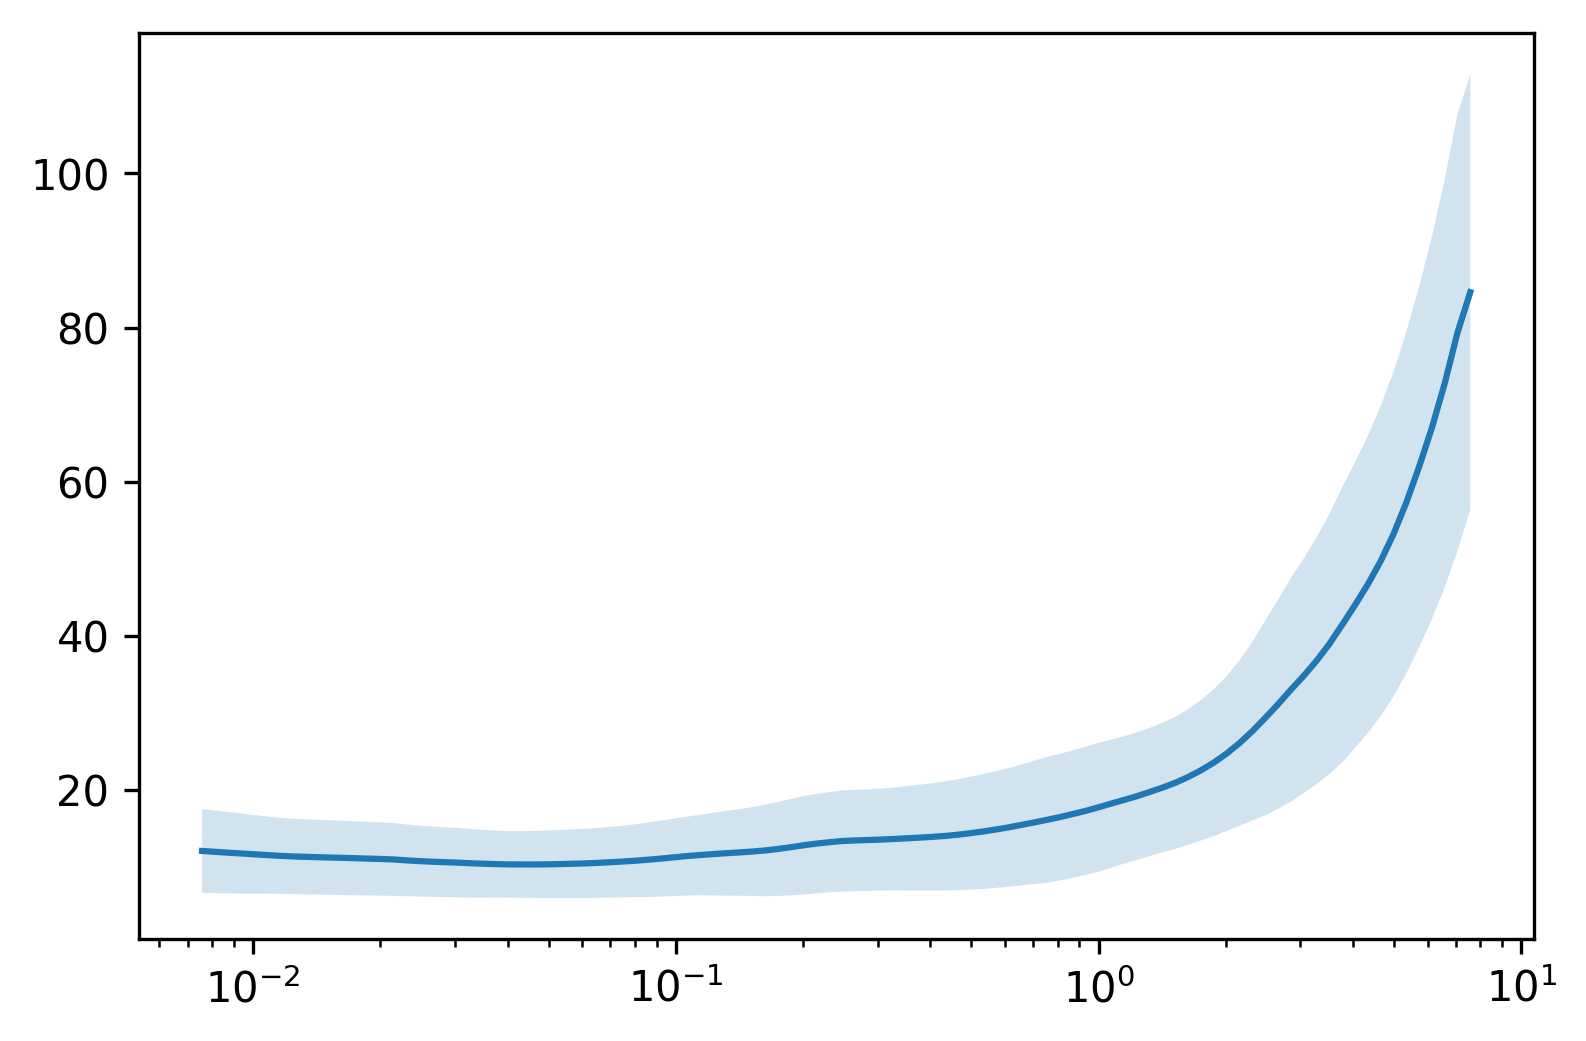

In [77]:
mean = np.mean(lasso.mse_path_, axis=1)
std = np.std(lasso.mse_path_, axis=1)
plt.plot(lasso.alphas_, mean)
plt.fill_between(lasso.alphas_,
                 mean + std,
                 mean - std, alpha=0.2)
plt.xscale("log")

In [78]:
lasso = Lasso(alpha=.1).fit(X_bc_poly, y_train)

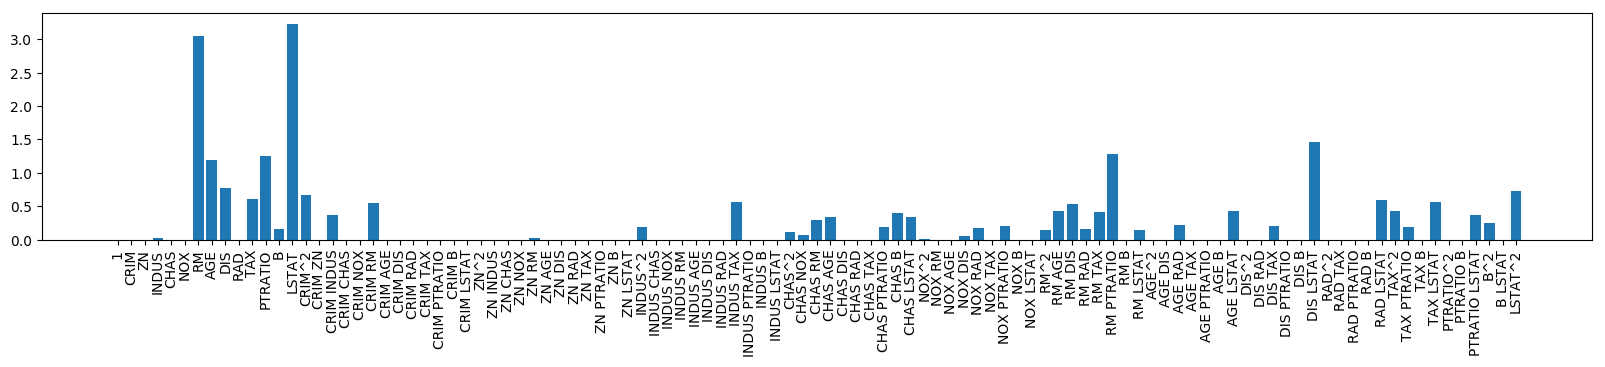

In [79]:
plt.figure(dpi=100, figsize=(20, 3))
plt.bar(range(lasso.coef_.shape[0]), np.abs(lasso.coef_))
plt.xticks(range(lasso.coef_.shape[0]), poly.get_feature_names(boston.feature_names), rotation=90, ha="center");

In [80]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(lasso, prefit=True)

In [81]:
X_selected = np.hstack([X_bc_scaled, select.transform(X_bc_poly)])

In [82]:
X_selected.shape

(379, 56)

In [83]:
scores = cross_val_score(RidgeCV(), X_selected, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.88271349649427644, 0.070449059947911091)

In [84]:
scores

array([ 0.94478102,  0.90848903,  0.72073806,  0.81759274,  0.90985971,
        0.90460807,  0.82698302,  0.94401853,  0.96360007,  0.8864647 ])

In [85]:
poly_feature_names = select.transform(np.array(poly.get_feature_names(boston.feature_names)).reshape(1, -1)).ravel()

In [86]:
new_feature_names = np.hstack([boston.feature_names, poly_feature_names])

In [87]:
new_feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM INDUS', 'CRIM RM', 'ZN RM',
       'INDUS^2', 'INDUS TAX', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS PTRATIO', 'CHAS B', 'CHAS LSTAT', 'NOX^2', 'NOX DIS',
       'NOX RAD', 'NOX PTRATIO', 'RM^2', 'RM AGE', 'RM DIS', 'RM RAD',
       'RM TAX', 'RM PTRATIO', 'RM LSTAT', 'AGE RAD', 'AGE LSTAT',
       'DIS TAX', 'DIS LSTAT', 'RAD LSTAT', 'TAX^2', 'TAX PTRATIO',
       'TAX LSTAT', 'PTRATIO LSTAT', 'B^2', 'LSTAT^2'], 
      dtype='<U13')

In [398]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(interaction_only=True), RidgeCV())

In [401]:
scores = cross_val_score(pipe, X, y, cv=KFold(10, shuffle=True))

In [402]:
np.mean(scores)

0.85351227661305507